#### 1.Loading data 

In [1]:
#### 1.Laoding_data.R 
# 1)Read COAD expression data
TCGA_COAD_RNAseqV2_normalized_log2_dataset <- readRDS("/data8t_4/JH/MyJobs/Read_dataset/TCGA_Hub/TCGA_Colon_Cancer_COAD/TCGA_COAD_RNAseqV2_normalized_log2_dataset.rds")
COAD.HiSeqV2.log2 <- TCGA_COAD_RNAseqV2_normalized_log2_dataset$COAD.HiSeqV2.log2
COAD.pheno <- TCGA_COAD_RNAseqV2_normalized_log2_dataset$COAD.pheno
#TCGA_COAD_RNAseqV2_normalized_log2_dataset$COAD.HiSeqV2.metadata
# 2)Read cluster resaults
Cluster.20200201.V7.Tumor <- readRDS("/data8t_4/JH/MyJobs/NormalCancer_TCGA_V2/Cluster.20200201.V7.Tumor.rds")
cutree.res <- Cluster.20200201.V7.Tumor$cutree.res
dynamicColors <- Cluster.20200201.V7.Tumor$dynamicColors
Cluster.df <- cbind(cutree.res,dynamicColors) 
Cluster.df <- as.data.frame(Cluster.df)
Cluster.df$rownames <- rownames(Cluster.df)
hclust.Res <- Cluster.20200201.V7.Tumor$hclust.Res
# 3)Read GeneSetCollection object gmt download from MSigDB
MSigDB_gmt_V7_symbols_dataset <- readRDS("/data8t_4/JH/MyJobs/Read_dataset/MSigDB/MSigDB_gmt_V7_symbols_dataset.rds")
MSigDB_gmt_V7_symbols <- MSigDB_gmt_V7_symbols_dataset$symbols.gmt.list
MSigDB_V7_metadata <- MSigDB_gmt_V7_symbols_dataset$MSigDB_V7_metadata
c2.all.v7.0.symbols.gmt <- MSigDB_gmt_V7_symbols$c2.all.v7.0.symbols.gmt
#c2.all.v7.0.symbols.gmt
#description(c2.all.v7.0.symbols.gmt[[1]])



#### 2.GSVA_MSigDB_analysis

In [2]:
#### 2.GSVA_MSigDB_analysis.R
## 1)Construct COAD Expression set object
library(Biobase)
all(rownames(Cluster.df)==colnames(COAD.HiSeqV2.log2))
## Subset the expression data to Cluster.df
expr.sub <- as.matrix(COAD.HiSeqV2.log2[,colnames(COAD.HiSeqV2.log2) %in% rownames(Cluster.df)])
Cluster.df.sub <- Cluster.df[colnames(expr.sub),1:2]
Cluster.df.sub <- new("AnnotatedDataFrame",
                      data=Cluster.df.sub)
all(rownames(Cluster.df.sub)==colnames(expr.sub))
COAD.ExpressionSet <- ExpressionSet(assayData=expr.sub,phenoData=Cluster.df.sub)

Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rowMeans, rownames,
    rowSums, sapply, setdiff, sort, table, tapply, union, unique,
    unsplit, which, which.max, which.min

Welcome to Bioconductor

    Vignettes contain introductory mat

[1] FALSE

[1] TRUE

In [3]:
### 2)GSVA
library(GSVA)
COAD.h.all.v7.0 <- gsva(exprs(COAD.ExpressionSet), MSigDB_gmt_V7_symbols$h.all.v7.0.symbols.gmt,
                         parallel.sz=1,min.sz=10, max.sz=500, verbose=TRUE)
dim(COAD.h.all.v7.0)
COAD.c2.all.v7.0 <- gsva(exprs(COAD.ExpressionSet), MSigDB_gmt_V7_symbols$c2.all.v7.0.symbols.gmt,
                         parallel.sz=1,min.sz=10, max.sz=500, verbose=TRUE)
dim(COAD.c2.all.v7.0)

COAD.c5.all.v7.0 <- gsva(exprs(COAD.ExpressionSet), MSigDB_gmt_V7_symbols$c5.all.v7.0.symbols.gmt,
                         parallel.sz=1,min.sz=1, max.sz=500, verbose=TRUE)
dim(COAD.c5.all.v7.0)
COAD.c6.all.v7.0 <- gsva(exprs(COAD.ExpressionSet), MSigDB_gmt_V7_symbols$c6.all.v7.0.symbols.gmt,
                         parallel.sz=1,min.sz=1, max.sz=500, verbose=TRUE)
dim(COAD.c6.all.v7.0)

Warning message in .local(expr, gset.idx.list, ...):
“497 genes with constant expression values throuhgout the samples.”Warning message in .local(expr, gset.idx.list, ...):
“Since argument method!="ssgsea", genes with constant expression values are discarded.”

Estimating GSVA scores for 50 gene sets.
Computing observed enrichment scores
Estimating ECDFs with Gaussian kernels
Using parallel with 1 cores
  |======================================================================| 100%


[1]  50 281

Warning message in .local(expr, gset.idx.list, ...):
“497 genes with constant expression values throuhgout the samples.”Warning message in .local(expr, gset.idx.list, ...):
“Since argument method!="ssgsea", genes with constant expression values are discarded.”

Estimating GSVA scores for 4655 gene sets.
Computing observed enrichment scores
Estimating ECDFs with Gaussian kernels
Using parallel with 1 cores
  |======================================================================| 100%


[1] 4655  281

Warning message in .local(expr, gset.idx.list, ...):
“497 genes with constant expression values throuhgout the samples.”Warning message in .local(expr, gset.idx.list, ...):
“Since argument method!="ssgsea", genes with constant expression values are discarded.”

Estimating GSVA scores for 9647 gene sets.
Computing observed enrichment scores
Estimating ECDFs with Gaussian kernels
Using parallel with 1 cores
  |======================================================================| 100%


[1] 9647  281

Warning message in .local(expr, gset.idx.list, ...):
“497 genes with constant expression values throuhgout the samples.”Warning message in .local(expr, gset.idx.list, ...):
“Since argument method!="ssgsea", genes with constant expression values are discarded.”

Estimating GSVA scores for 189 gene sets.
Computing observed enrichment scores
Estimating ECDFs with Gaussian kernels
Using parallel with 1 cores
  |======================================================================| 100%


[1] 189 281

#### 3.Significant_MSigDB_analysis

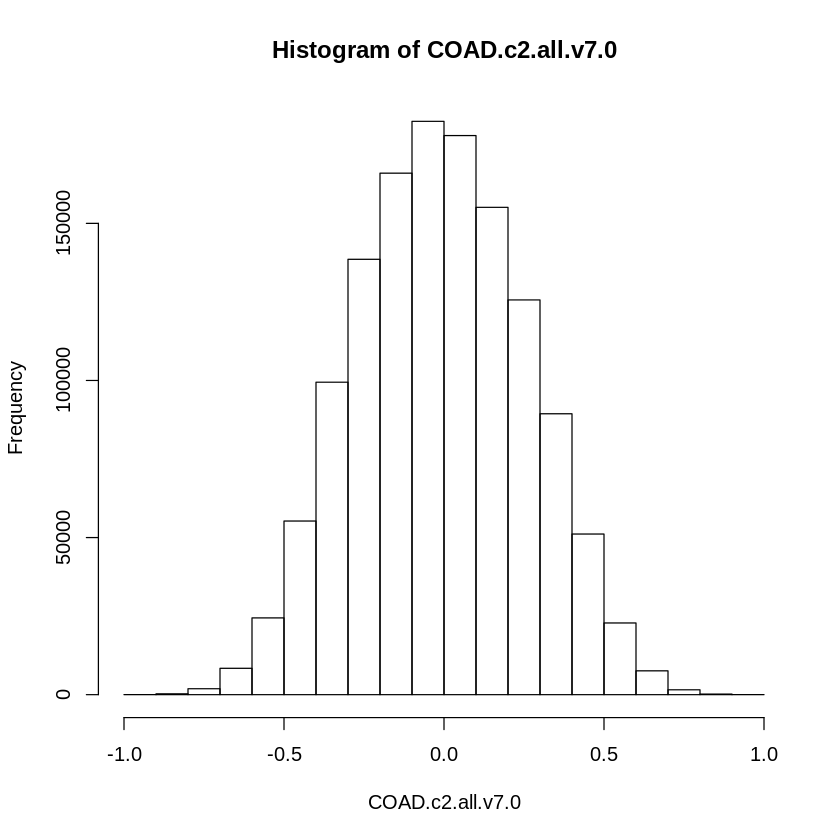

In [5]:
#### 3.Significant_MSigDB_analysis.R
### 1.Exame distribution of ssGSEA score
hist(COAD.c2.all.v7.0)
### 2.Using limma to find significant pathway in each groups
library(Biobase)
## 1) Build an ExpressionSet
COAD.h.all.Set <- ExpressionSet(assayData=COAD.h.all.v7.0,phenoData=Cluster.df.sub)
COAD.c2.all.Set <- ExpressionSet(assayData=COAD.c2.all.v7.0,phenoData=Cluster.df.sub)
COAD.c5.all.Set <- ExpressionSet(assayData=COAD.c5.all.v7.0,phenoData=Cluster.df.sub)
COAD.c6.all.Set <- ExpressionSet(assayData=COAD.c6.all.v7.0,phenoData=Cluster.df.sub)
## Several Groups experiment design
#COAD.c2.all.Set@phenoData@data
  
f <- factor(Cluster.df.sub@data$dynamicColors, levels=c("blue","brown","turquoise","yellow"))
design <- model.matrix(~0+f)
colnames(design) <- c("blue","brown","turquoise","yellow")

##### 1) COAD.h.all.Set

Coefficients not estimable: yellow 


Warning message:
“Partial NA coefficients for 50 probe(s)”

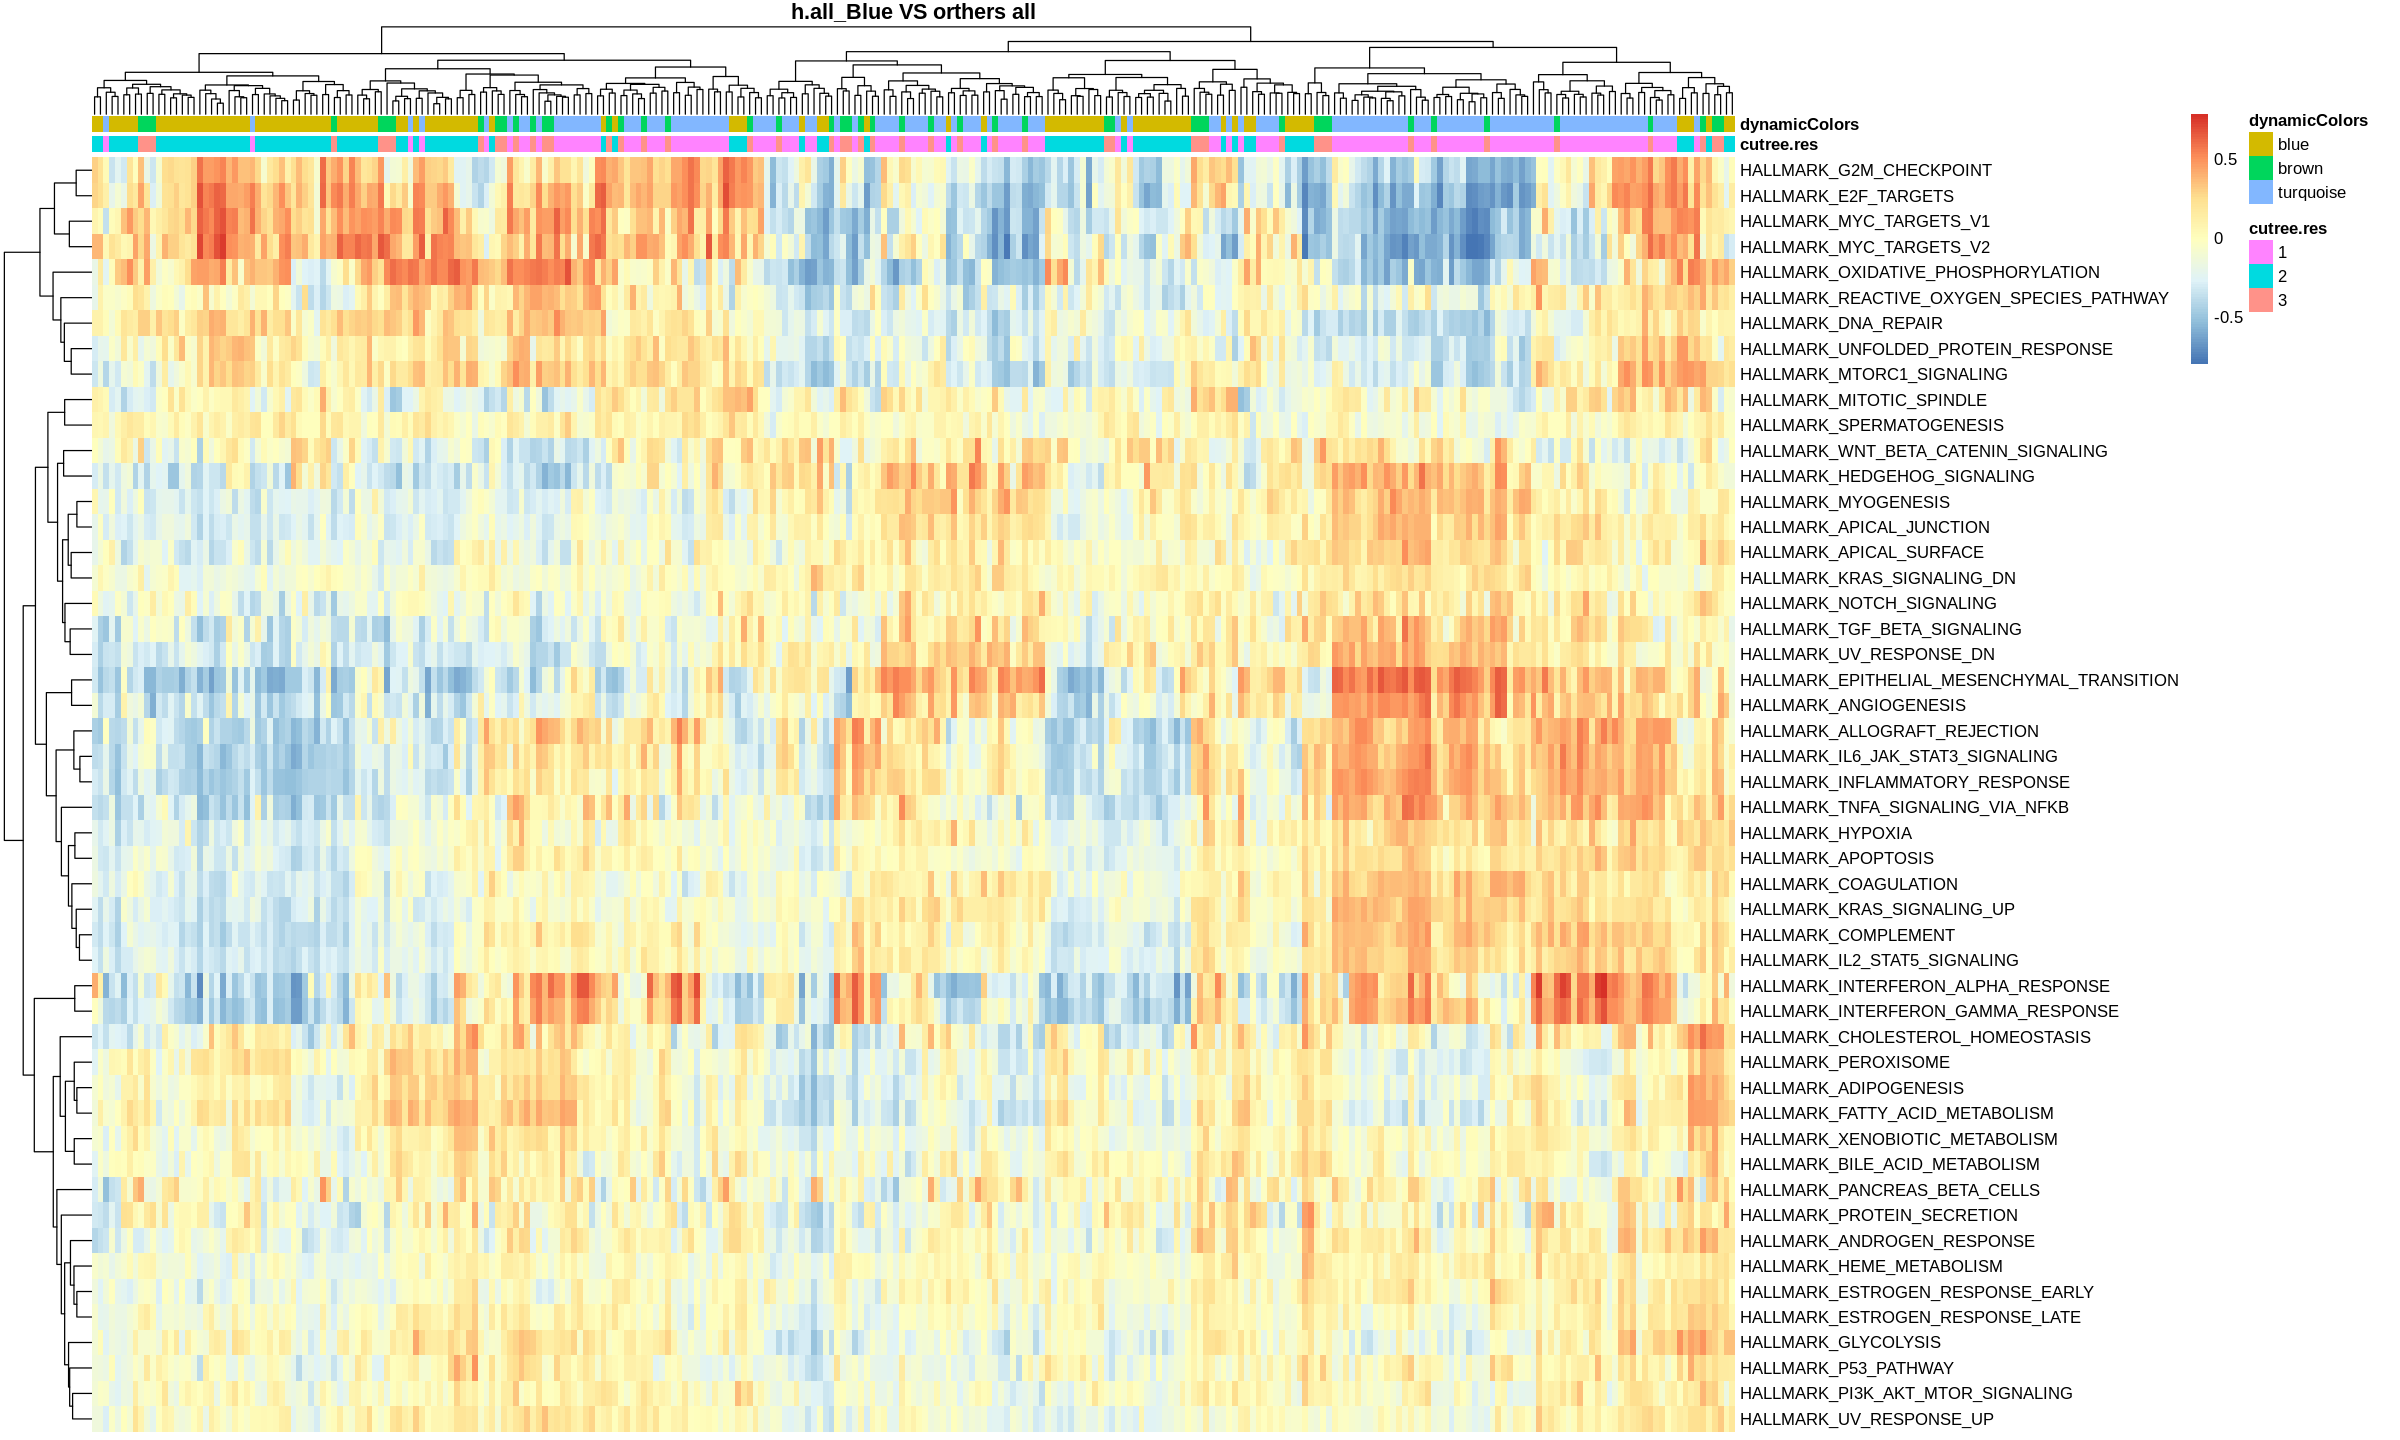

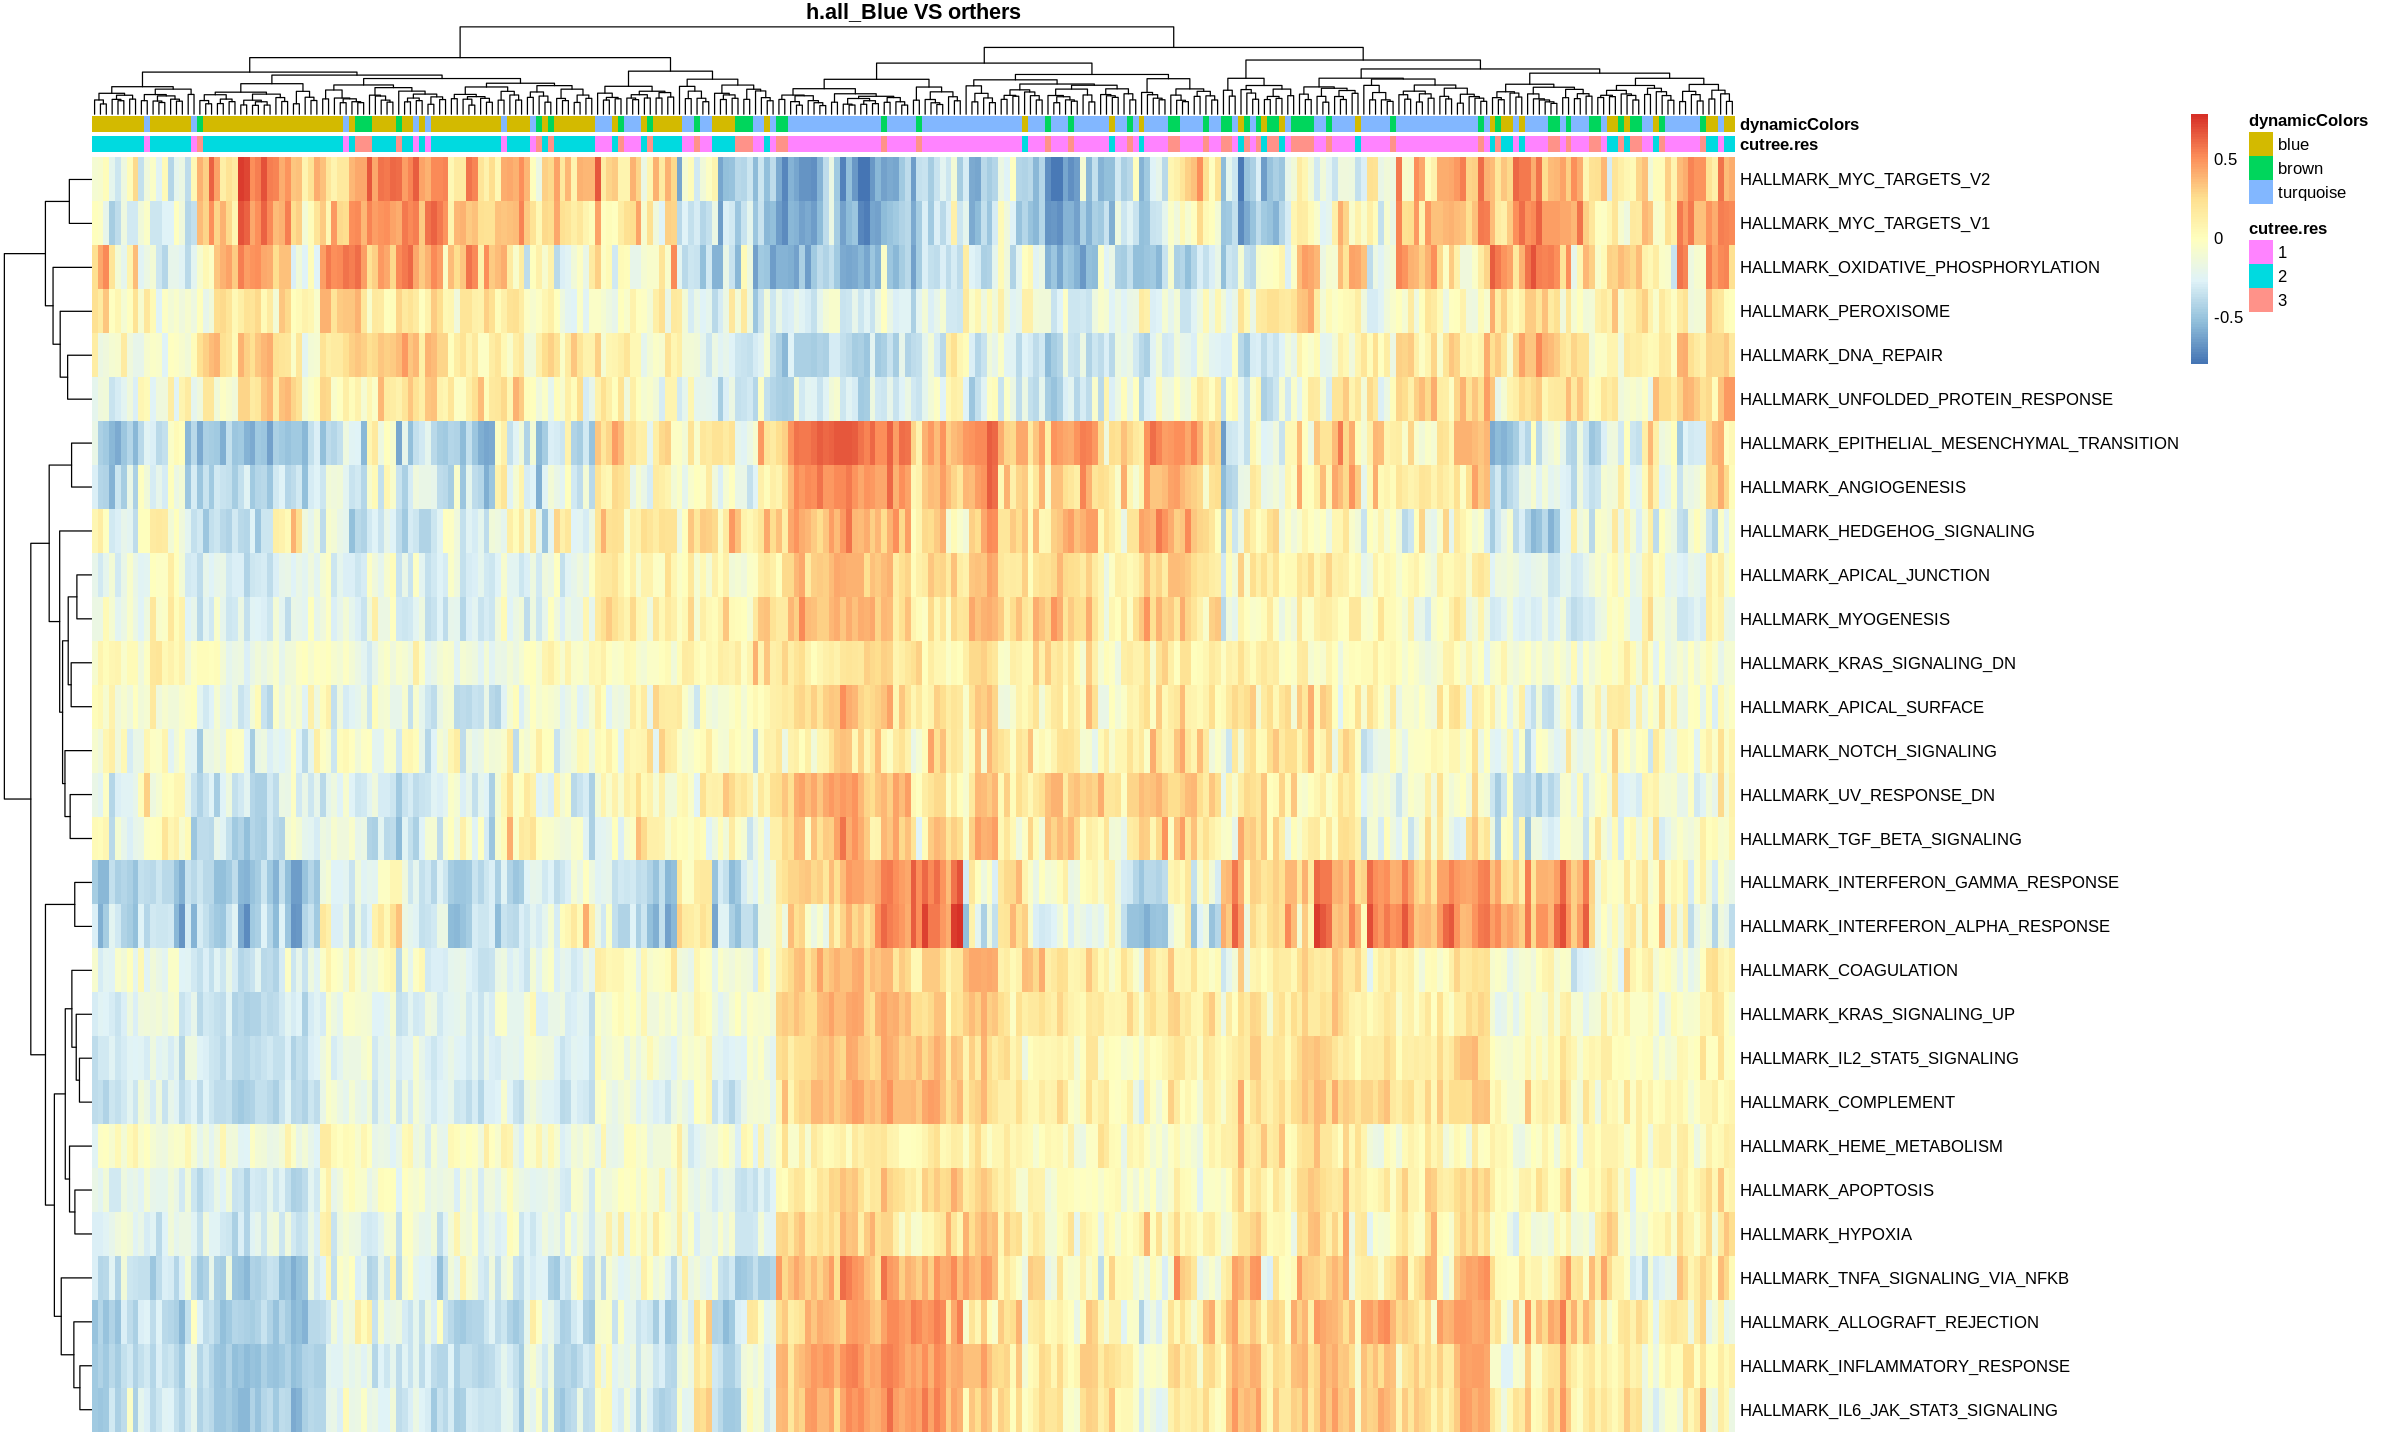

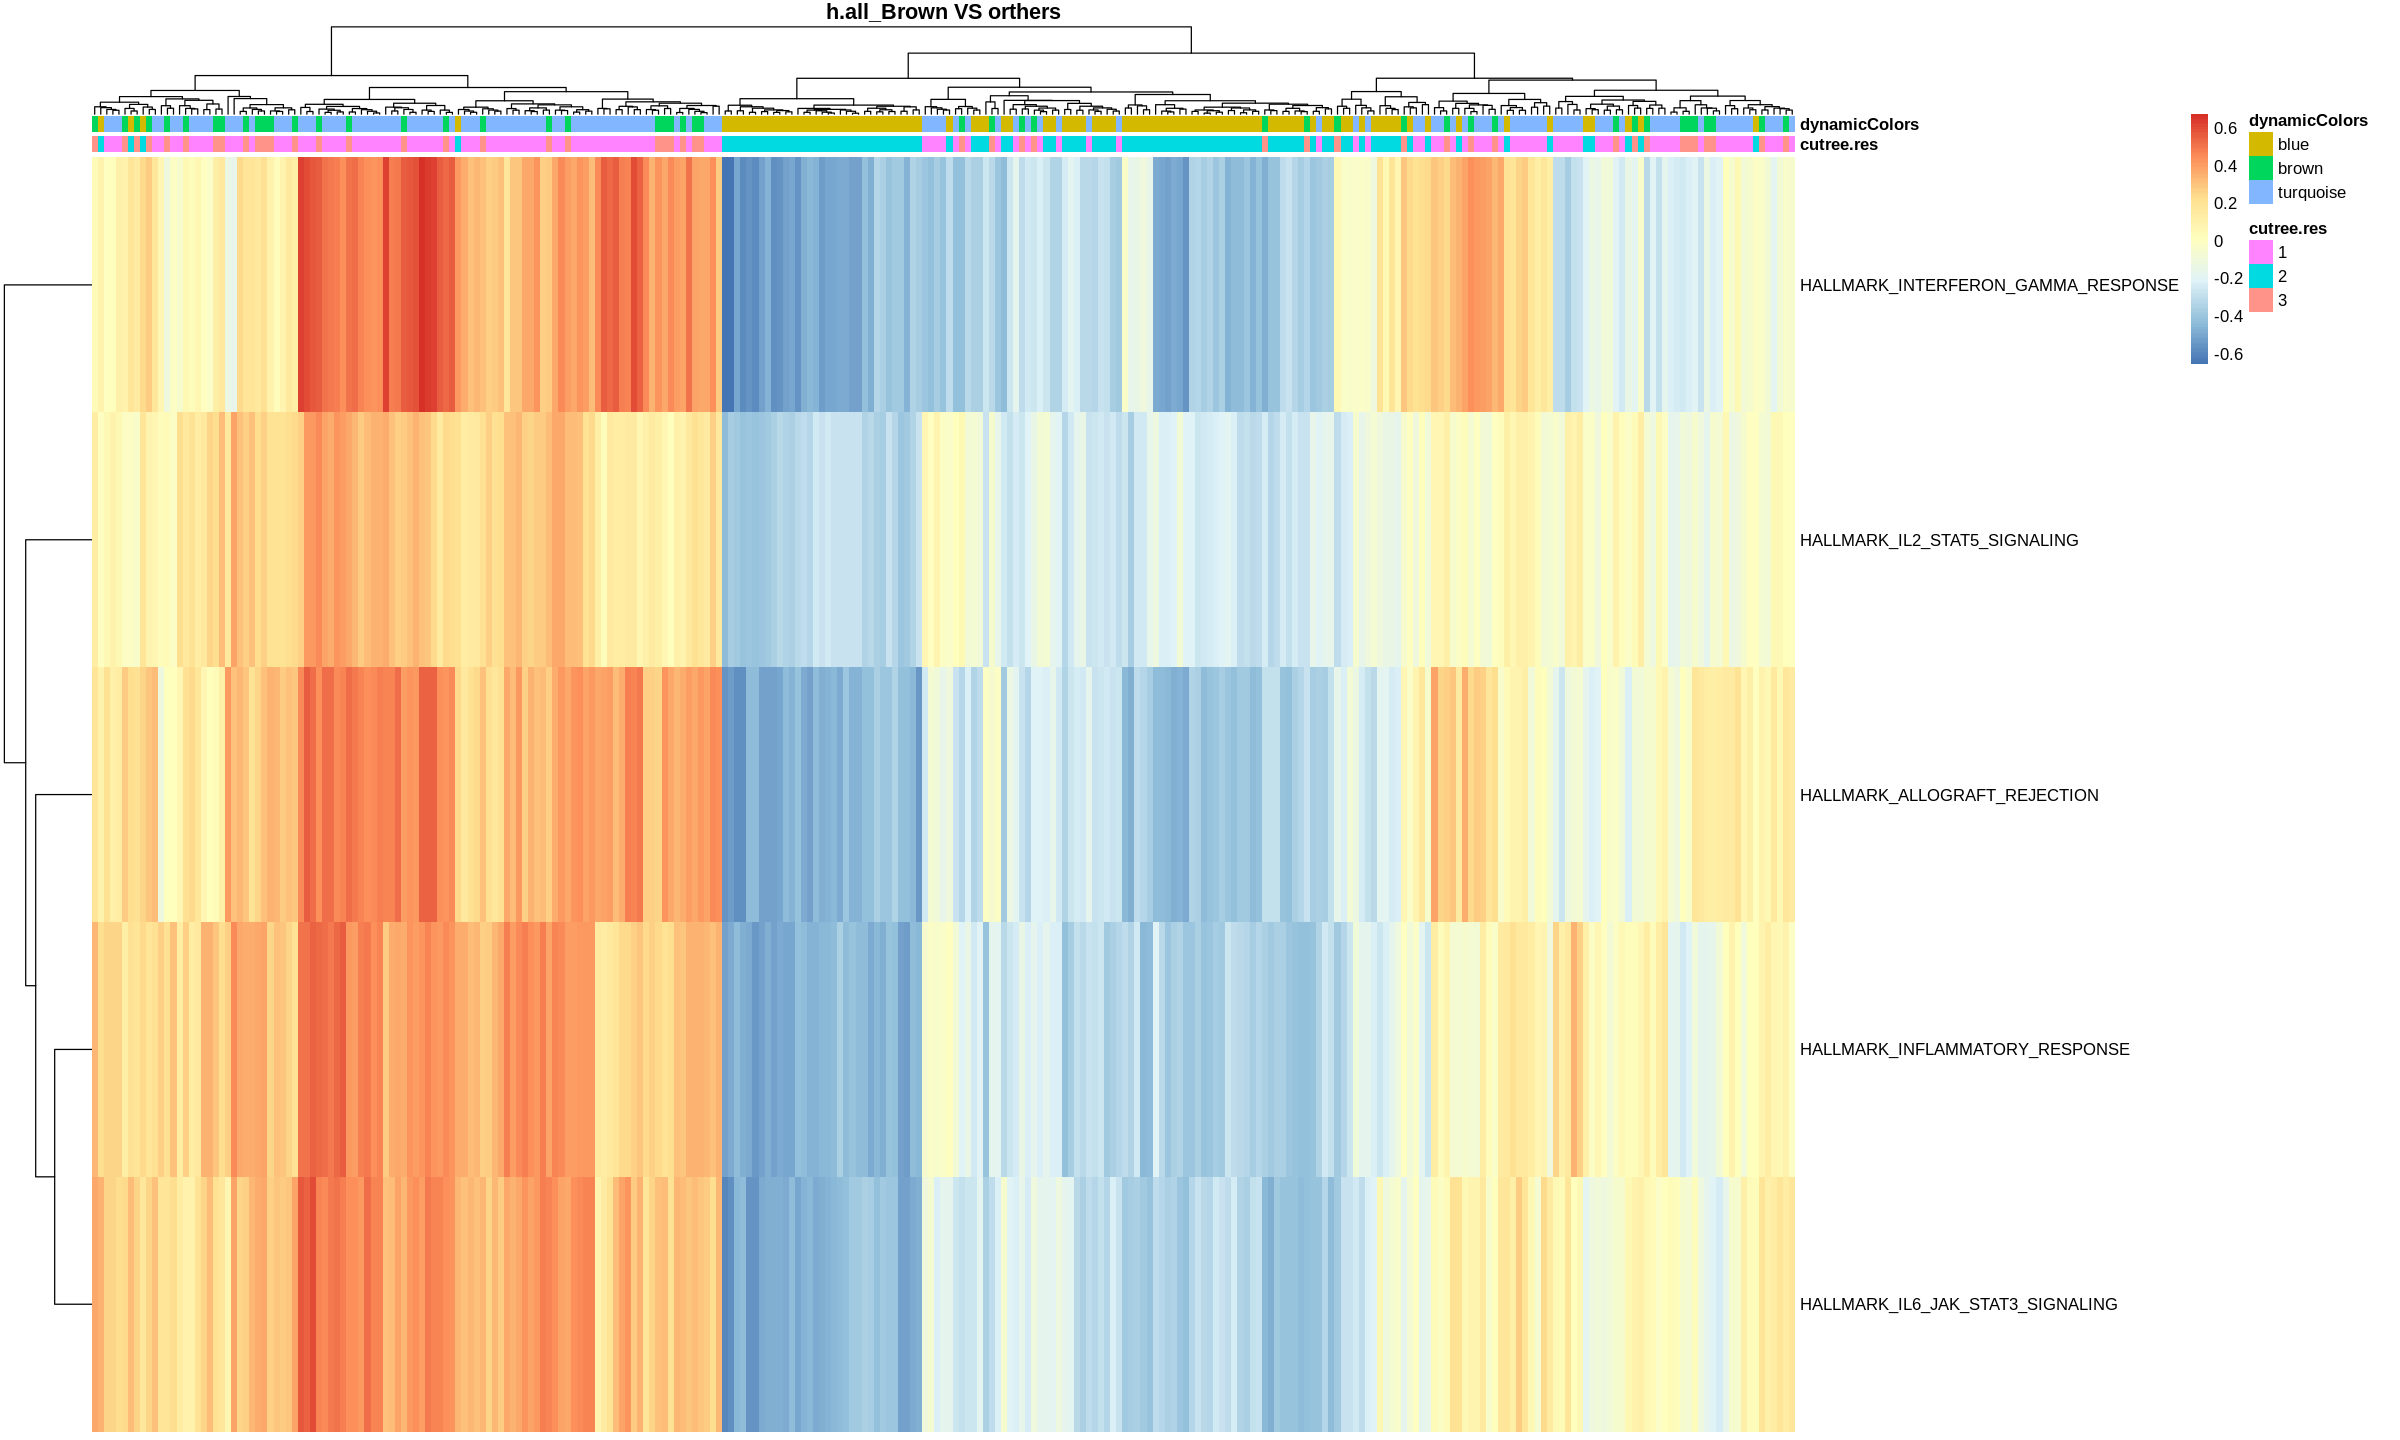

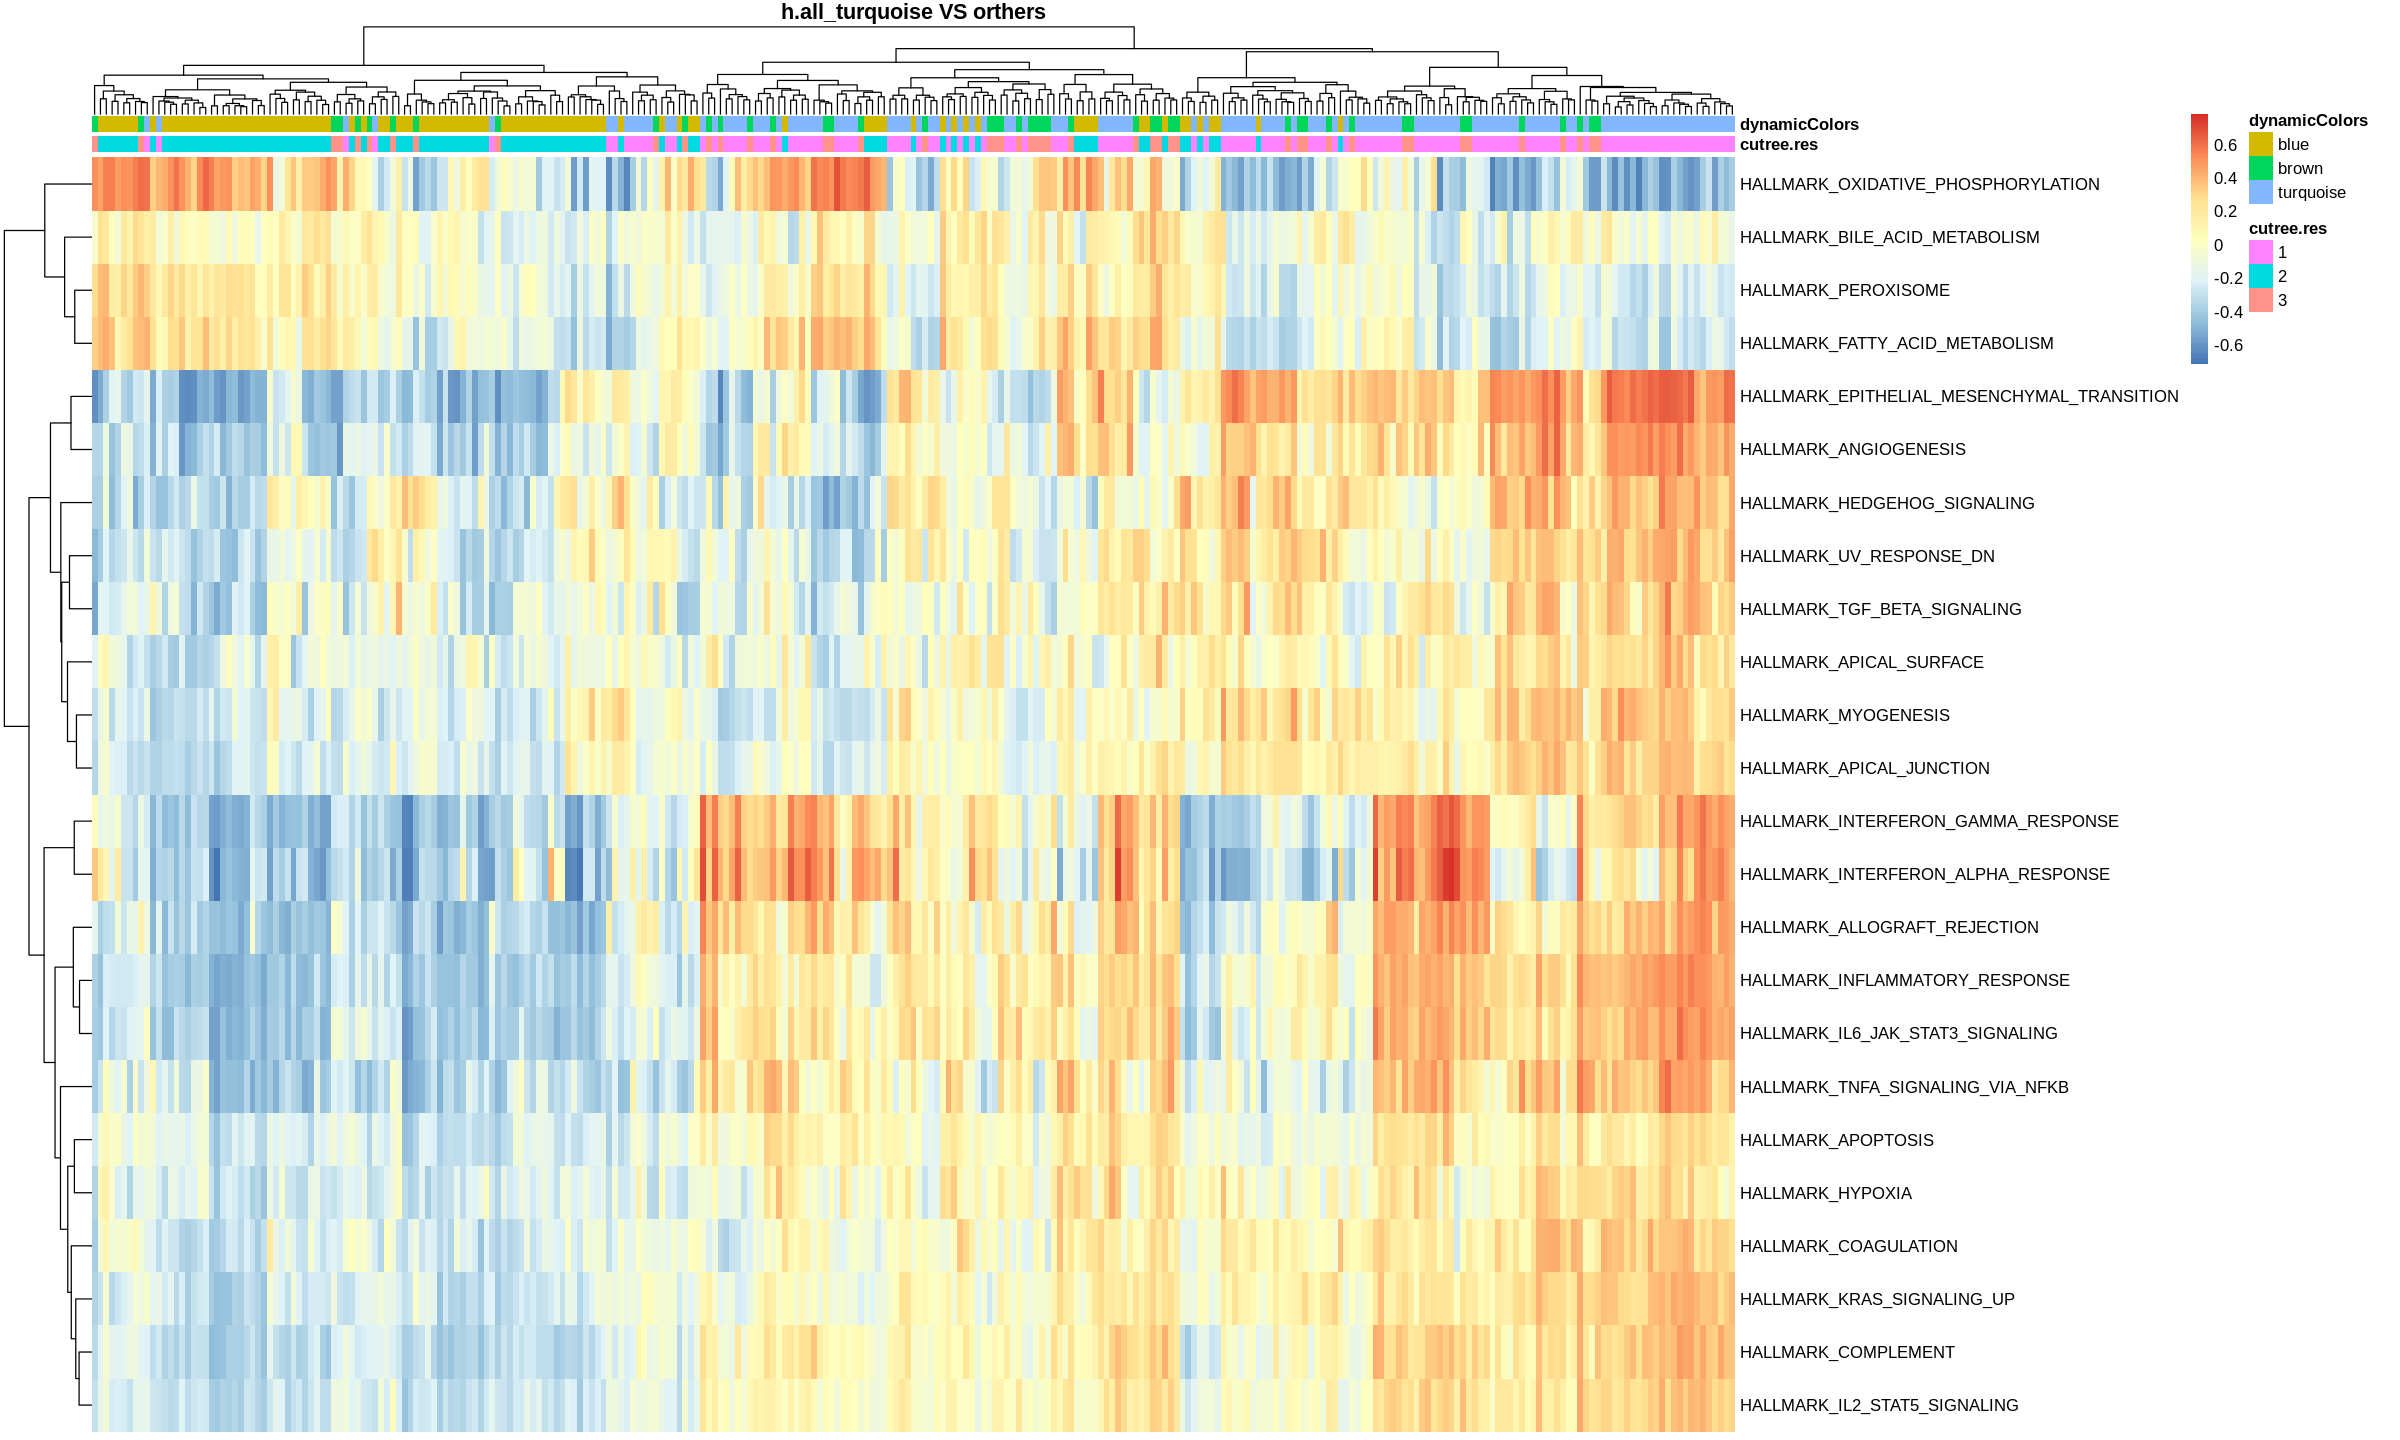

In [8]:
###################### COAD.h.all.Set #################
## Cut off
adjPvalueCutoff <- 0.001
number = 50
library(pheatmap)
library(limma)
fit.h <- lmFit(COAD.h.all.Set, design)
contrast.matrix <- makeContrasts(blue-(brown+turquoise), 
                                 brown-(blue+turquoise),
                                 turquoise-(brown+blue),
                                 levels=design)
fit.h.2 <- contrasts.fit(fit.h, contrast.matrix)
fit.h.2 <- eBayes(fit.h.2)

DEgeneSets.blue.h <- topTable(fit.h.2, coef="blue - (brown + turquoise)", number=number,
                               p.value=adjPvalueCutoff,adjust="BH")
DEgeneSets.brown.h <- topTable(fit.h.2, coef="brown - (blue + turquoise)", number=number,
                                p.value=adjPvalueCutoff,adjust="BH")
DEgeneSets.turquoise.h <- topTable(fit.h.2, coef="turquoise - (brown + blue)", number=number,
                                    p.value=adjPvalueCutoff,adjust="BH")
### plot
options(repr.plot.width=20, repr.plot.height=12)
#library(pheatmap)
pheatmap::pheatmap(COAD.h.all.Set,annotation_col = pData(COAD.h.all.Set),
                   main = "h.all_Blue VS orthers all",show_colnames = F)
pheatmap::pheatmap(COAD.h.all.Set[rownames(DEgeneSets.blue.h),],annotation_col = pData(COAD.h.all.Set),
                   main = "h.all_Blue VS orthers",show_colnames = F)
pheatmap::pheatmap(COAD.h.all.Set[rownames(DEgeneSets.brown.h),],annotation_col = pData(COAD.h.all.Set),
                   main = "h.all_Brown VS orthers",show_colnames = F)
pheatmap::pheatmap(COAD.h.all.Set[rownames(DEgeneSets.turquoise.h),],annotation_col = pData(COAD.h.all.Set),
                   main = "h.all_turquoise VS orthers",show_colnames = F)

##### 2) COAD.c2.all.Set

Coefficients not estimable: yellow 


Warning message:
“Partial NA coefficients for 4655 probe(s)”

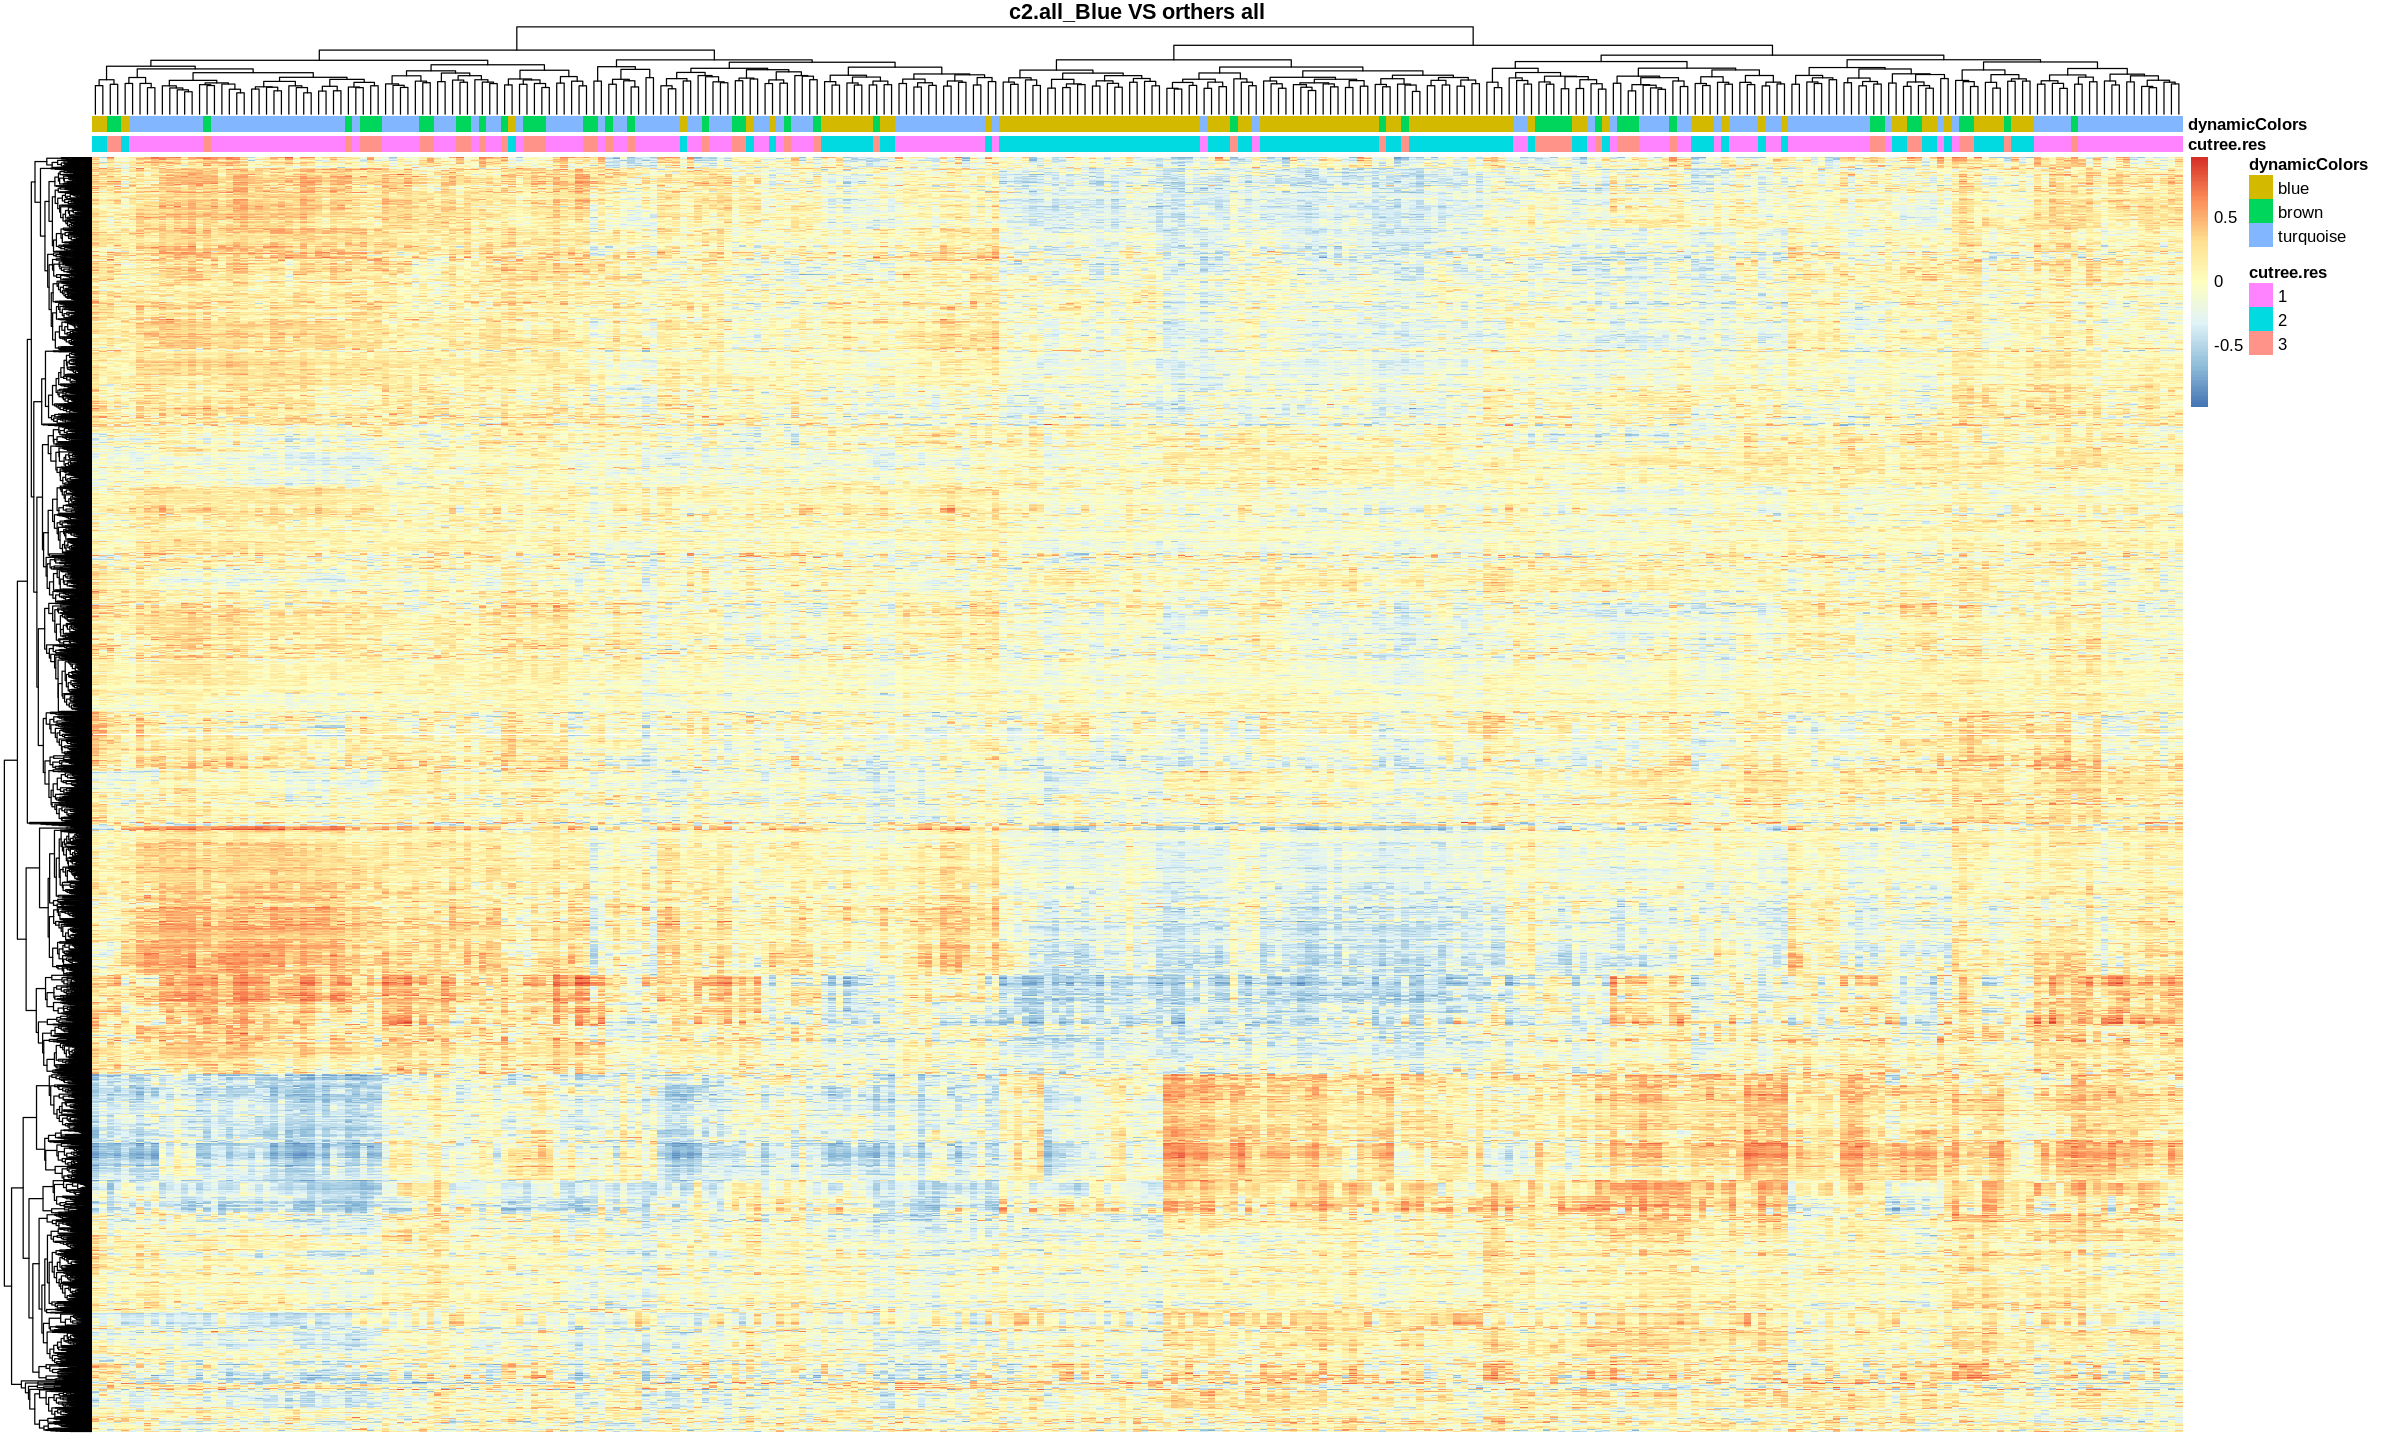

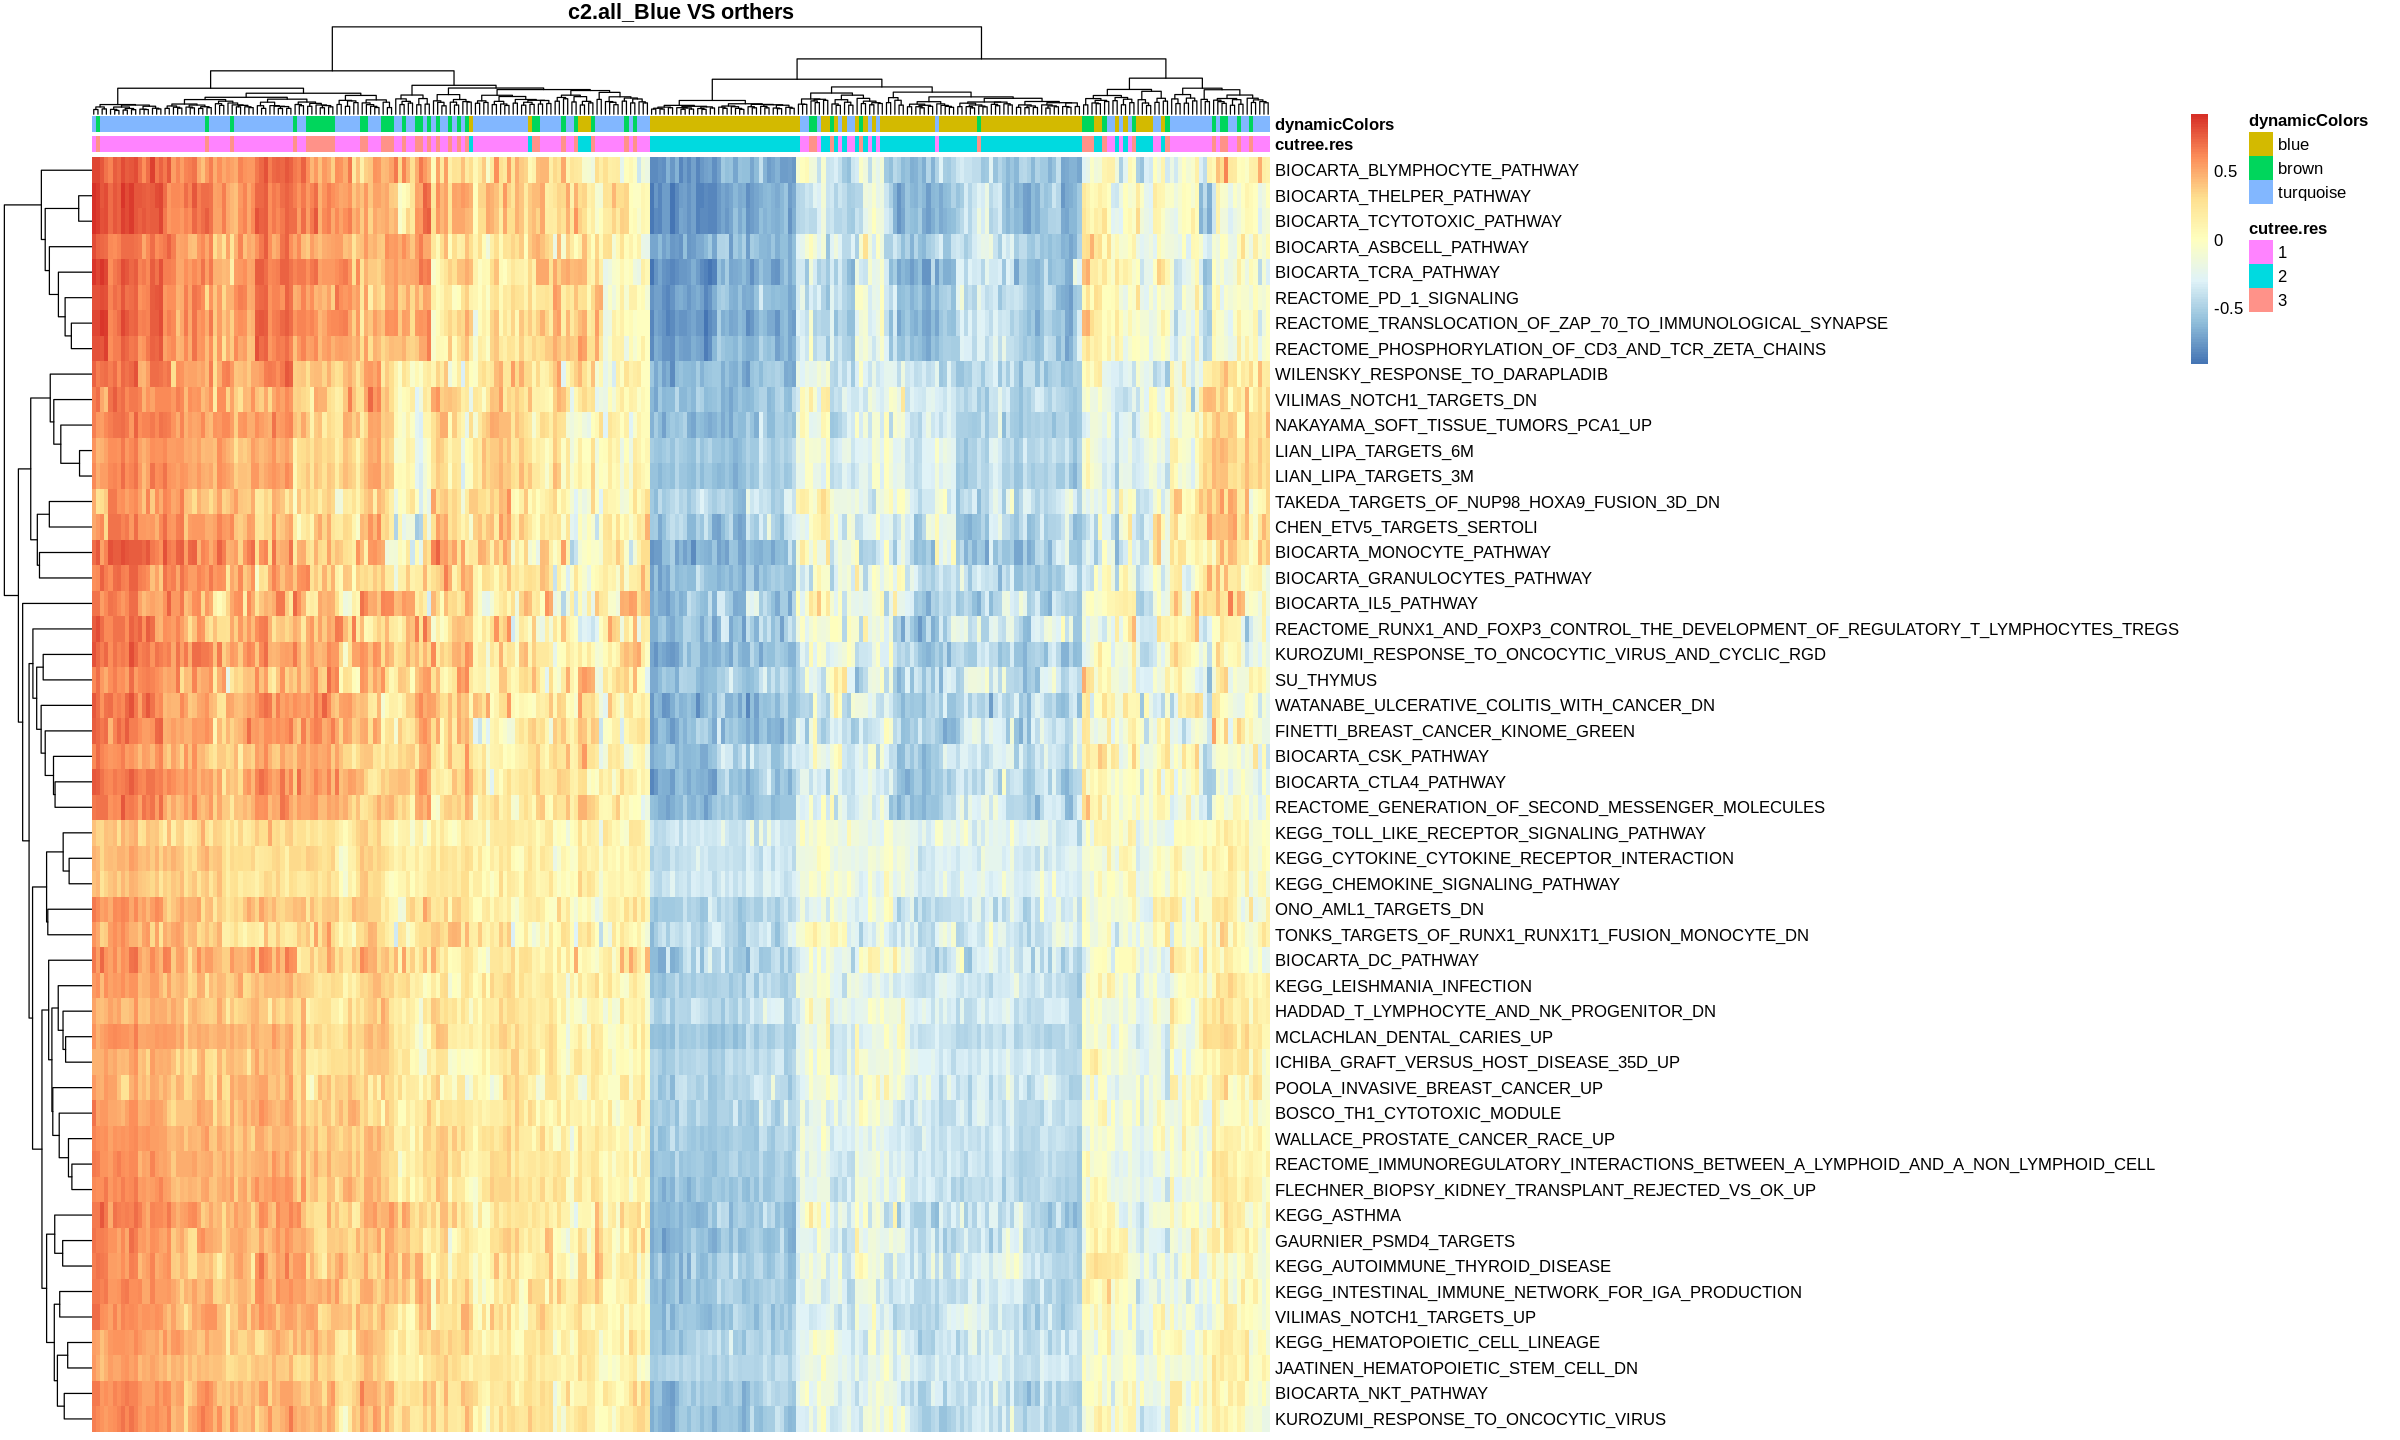

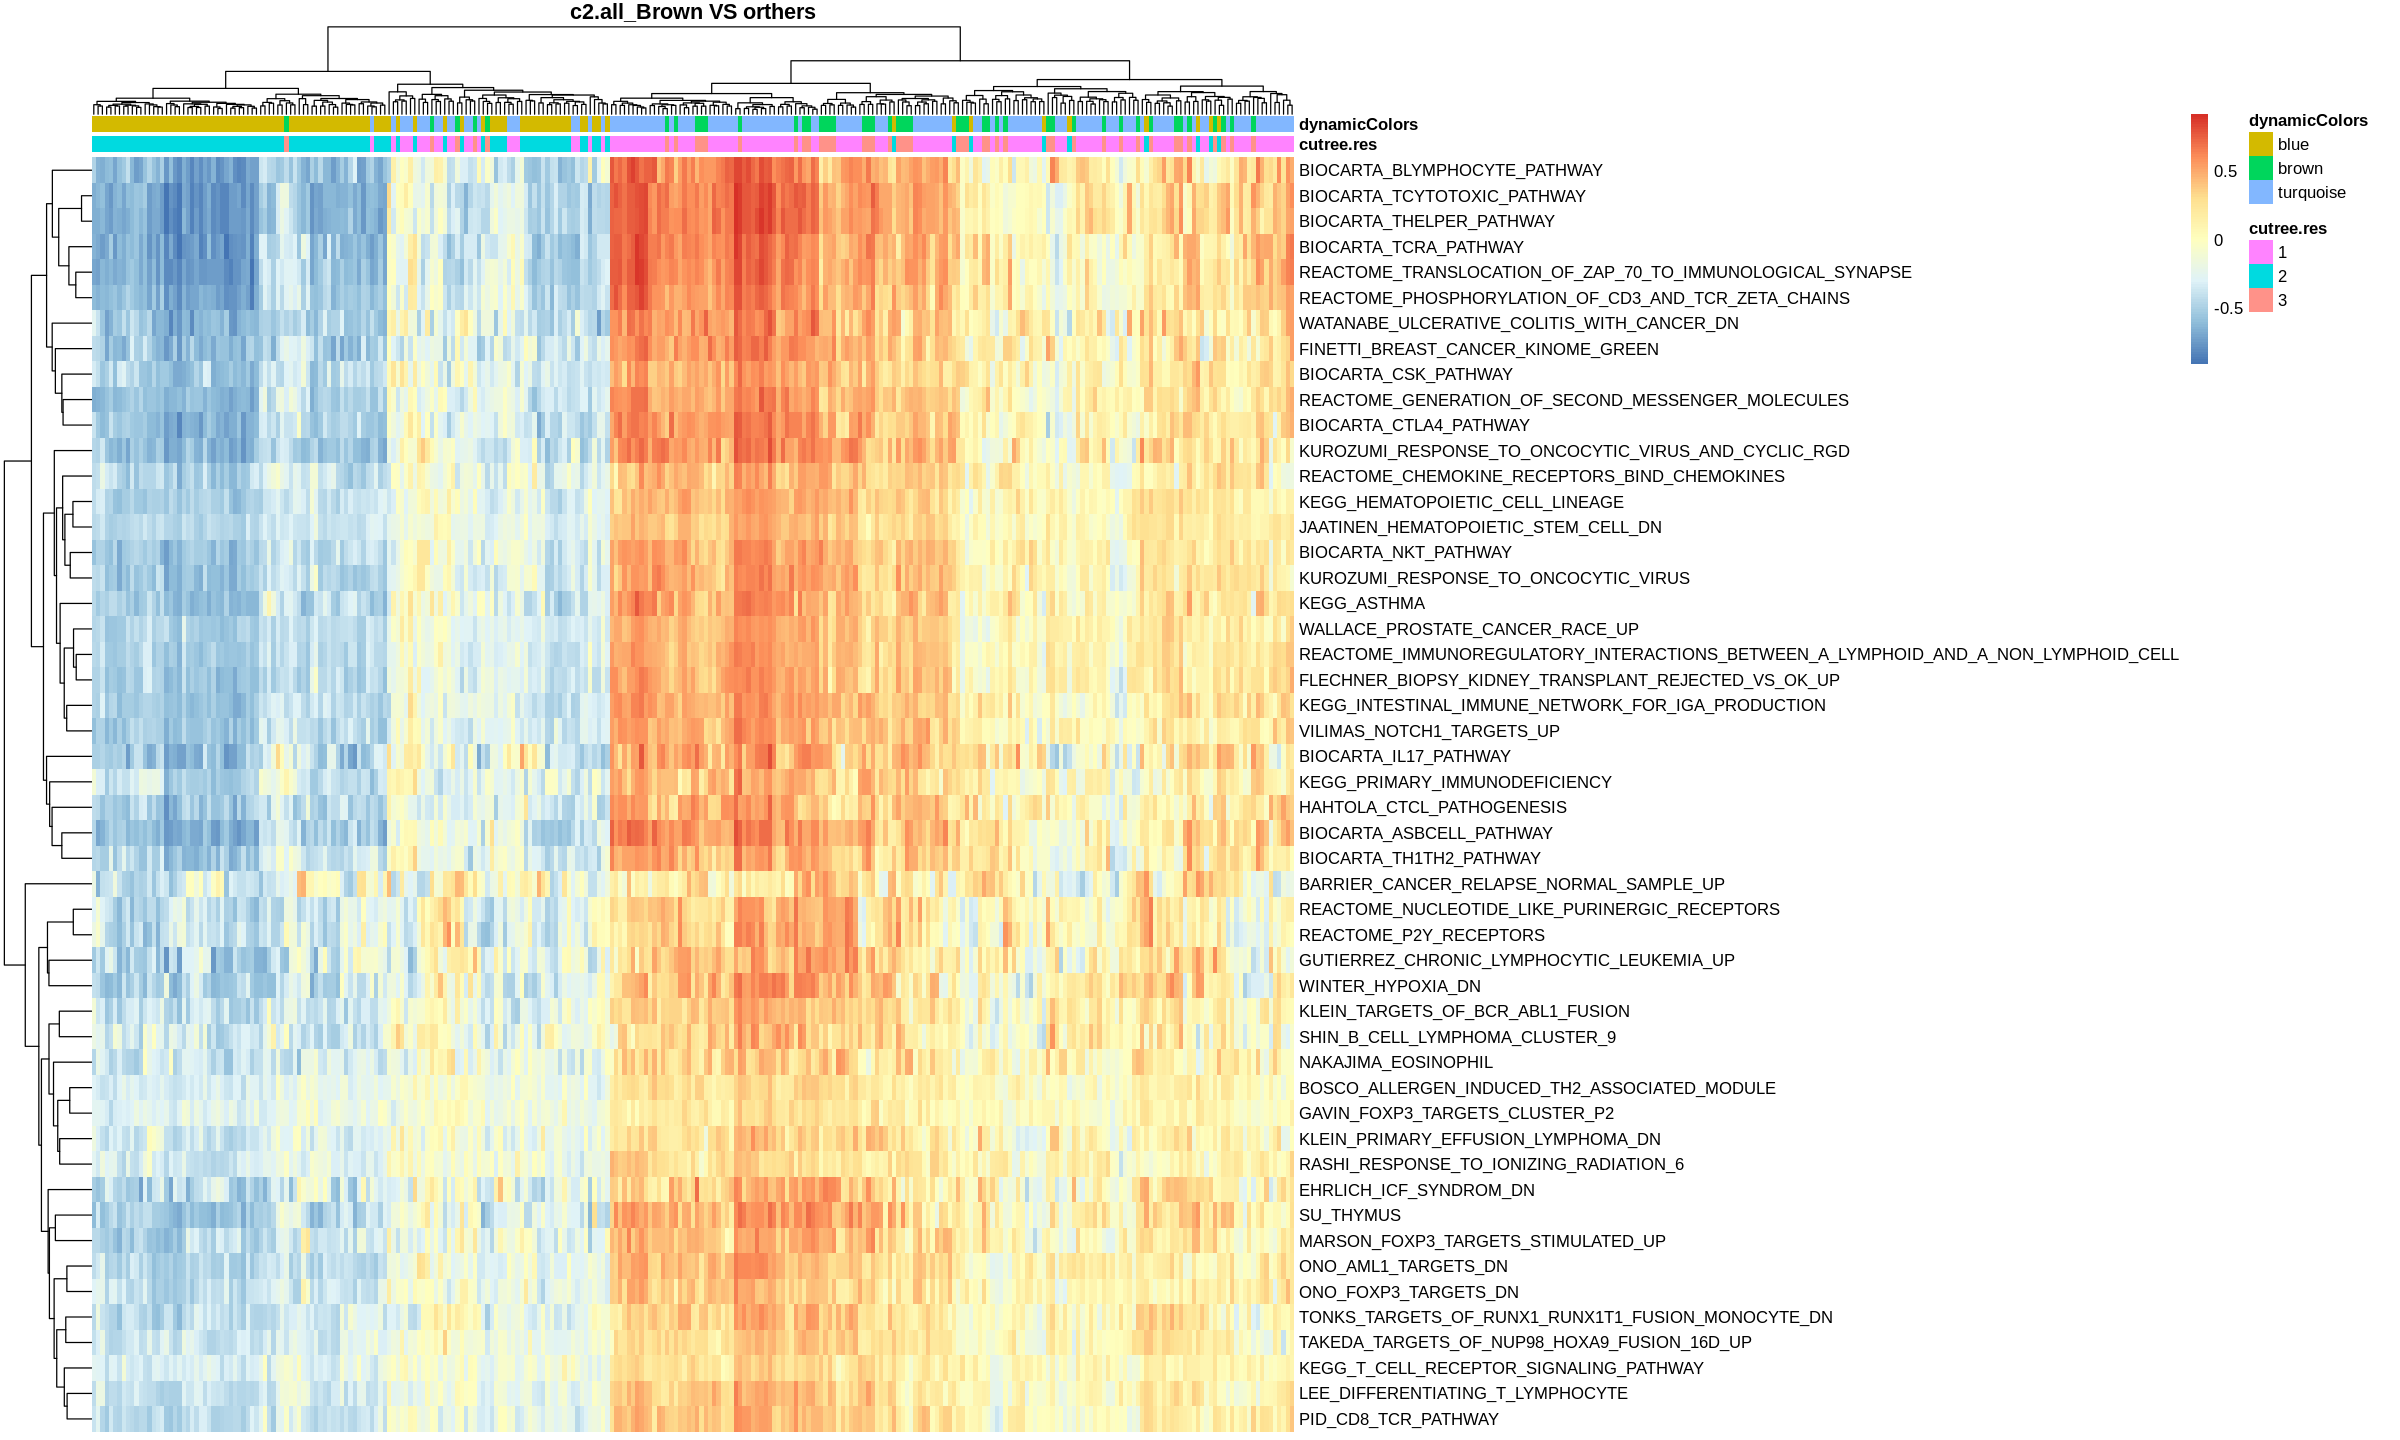

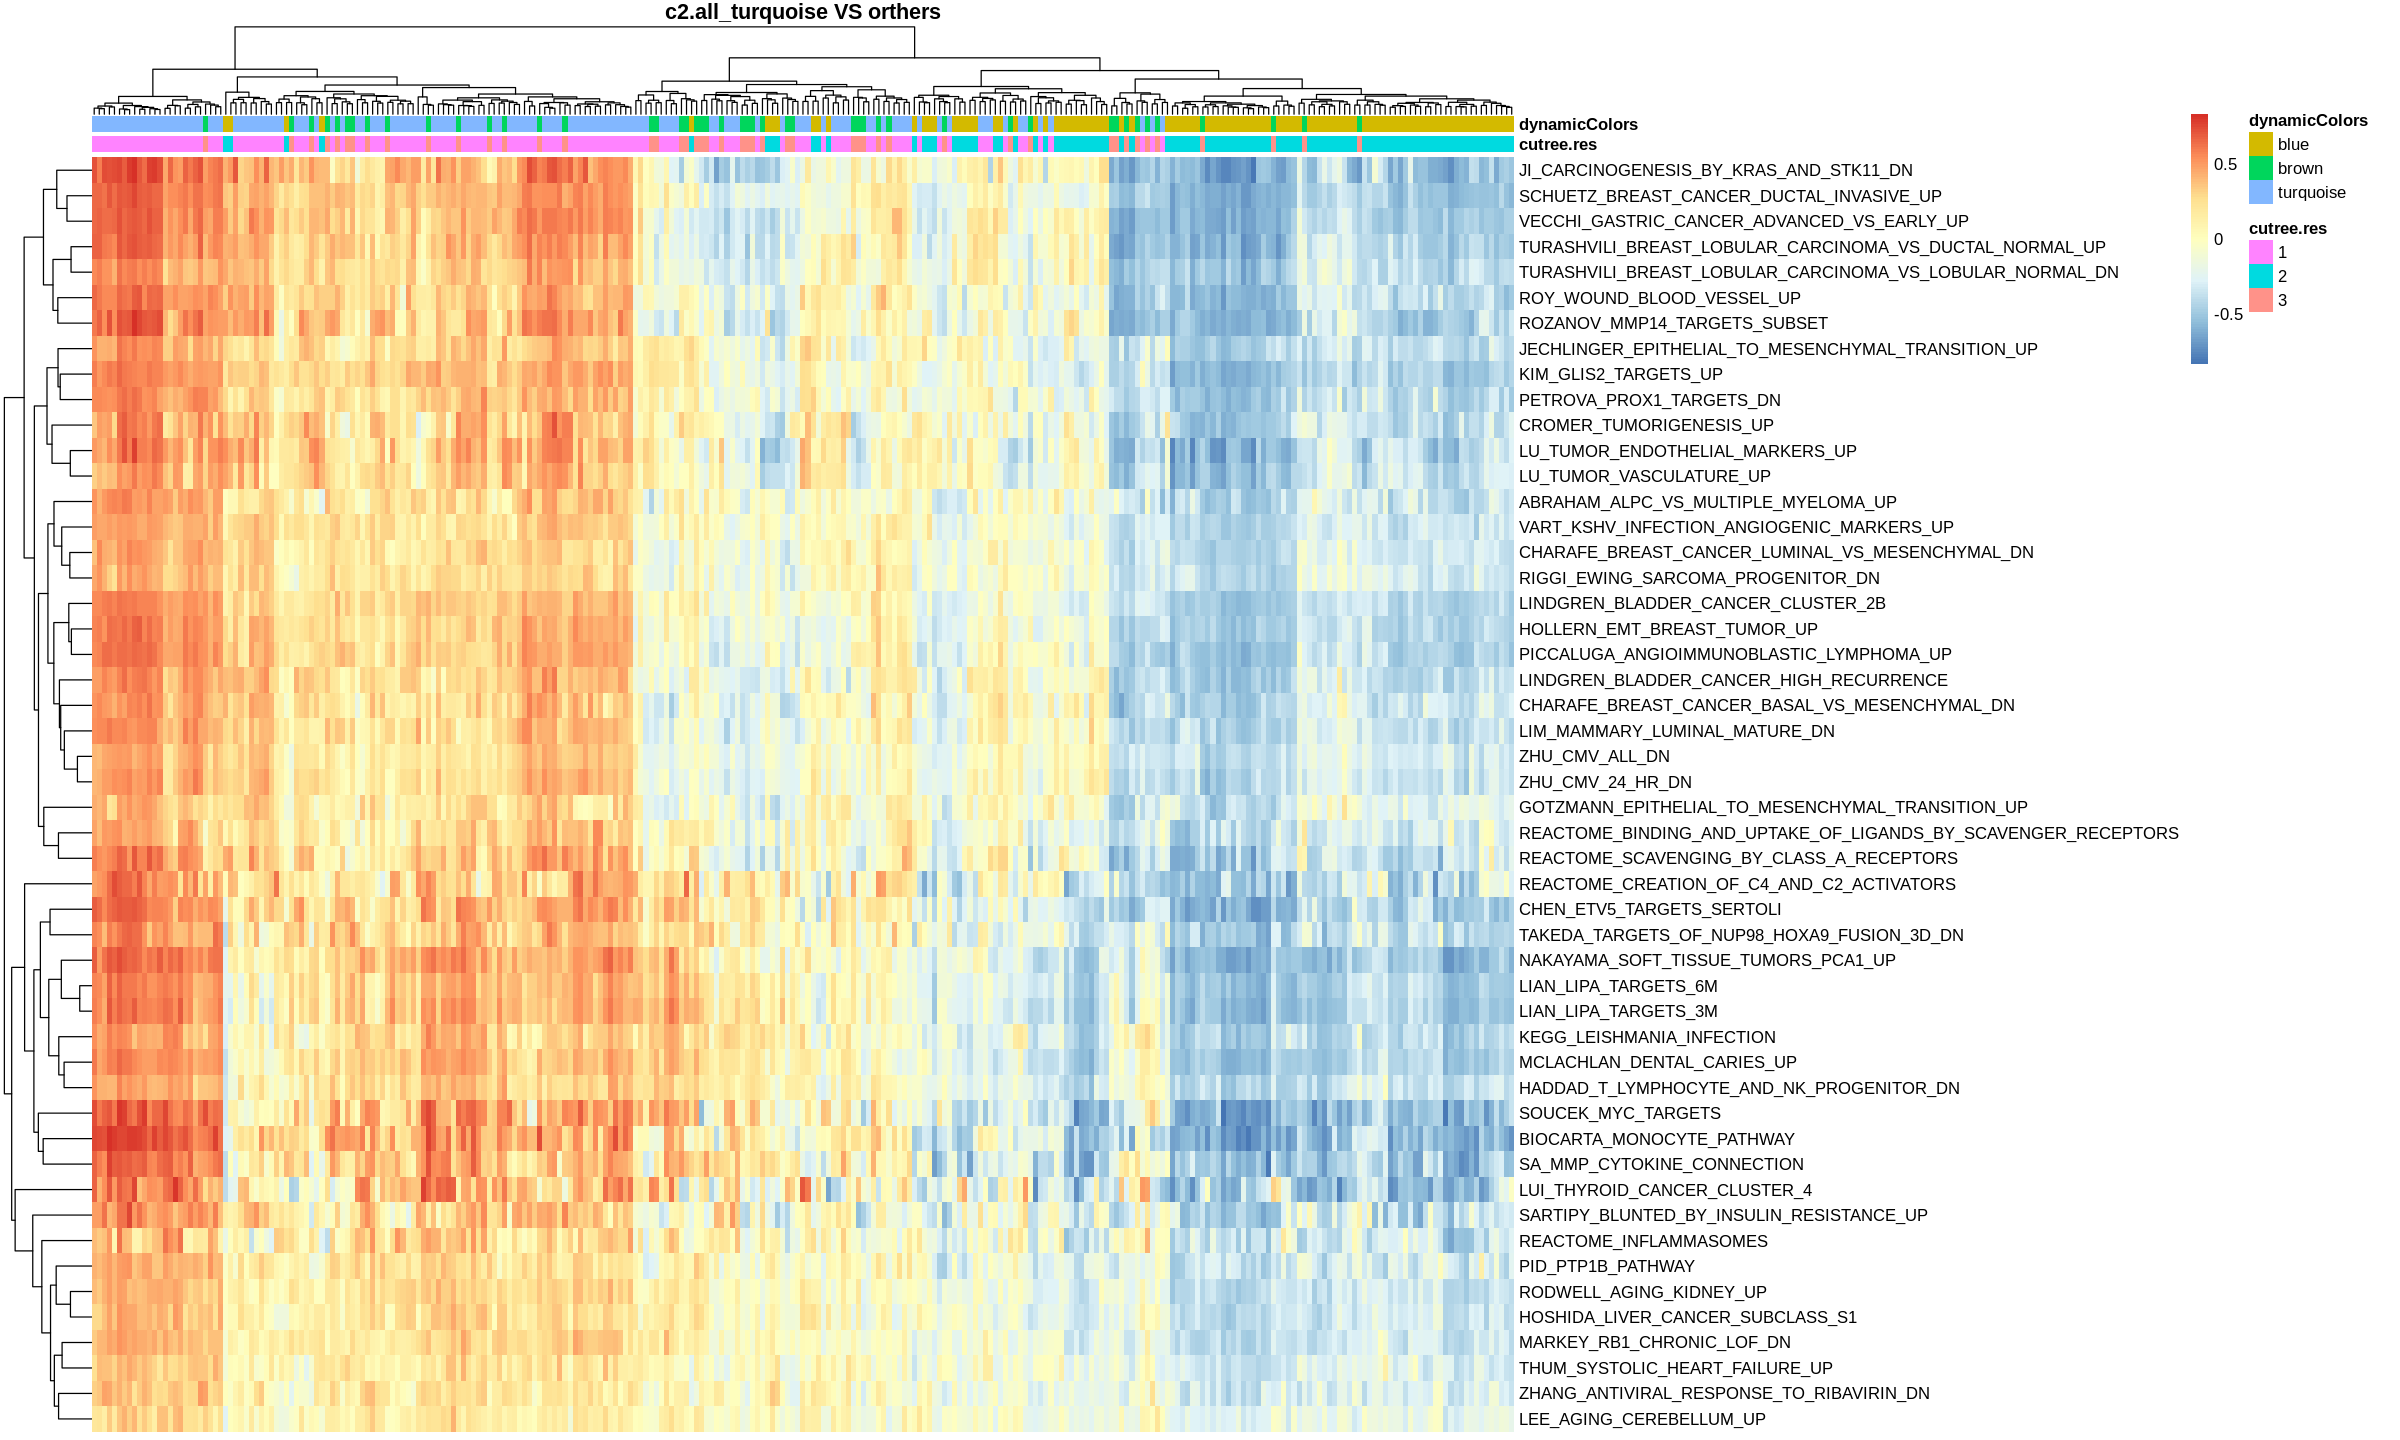

In [9]:
###################### COAD.c2.all.Set #################
## Cut off
adjPvalueCutoff <- 0.001
number = 50
library(pheatmap)
library(limma)
fit.c2 <- lmFit(COAD.c2.all.Set, design)
contrast.matrix <- makeContrasts(blue-(brown+turquoise), 
                                 brown-(blue+turquoise),
                                 turquoise-(brown+blue),
                                 levels=design)
fit.c2.2 <- contrasts.fit(fit.c2, contrast.matrix)
fit.c2.2 <- eBayes(fit.c2.2)

DEgeneSets.blue.c2 <- topTable(fit.c2.2, coef="blue - (brown + turquoise)", number=number,
                                    p.value=adjPvalueCutoff,adjust="BH")
DEgeneSets.brown.c2 <- topTable(fit.c2.2, coef="brown - (blue + turquoise)", number=number,
                                 p.value=adjPvalueCutoff,adjust="BH")
DEgeneSets.turquoise.c2 <- topTable(fit.c2.2, coef="turquoise - (brown + blue)", number=number,
                                    p.value=adjPvalueCutoff,adjust="BH")
#library(pheatmap)
pheatmap::pheatmap(COAD.c2.all.Set,annotation_col = pData(COAD.c2.all.Set),
                   main = "c2.all_Blue VS orthers all",show_rownames = F, show_colnames = F)
pheatmap::pheatmap(COAD.c2.all.Set[rownames(DEgeneSets.blue.c2),],annotation_col = pData(COAD.c2.all.Set),
                   main = "c2.all_Blue VS orthers",show_colnames = F)
pheatmap::pheatmap(COAD.c2.all.Set[rownames(DEgeneSets.brown.c2),],annotation_col = pData(COAD.c2.all.Set),
                   main = "c2.all_Brown VS orthers",show_colnames = F)
pheatmap::pheatmap(COAD.c2.all.Set[rownames(DEgeneSets.turquoise.c2),],annotation_col = pData(COAD.c2.all.Set),
                   main = "c2.all_turquoise VS orthers",show_colnames = F)



##### 3) COAD.c5.all.Set

Coefficients not estimable: yellow 


Warning message:
“Partial NA coefficients for 9647 probe(s)”

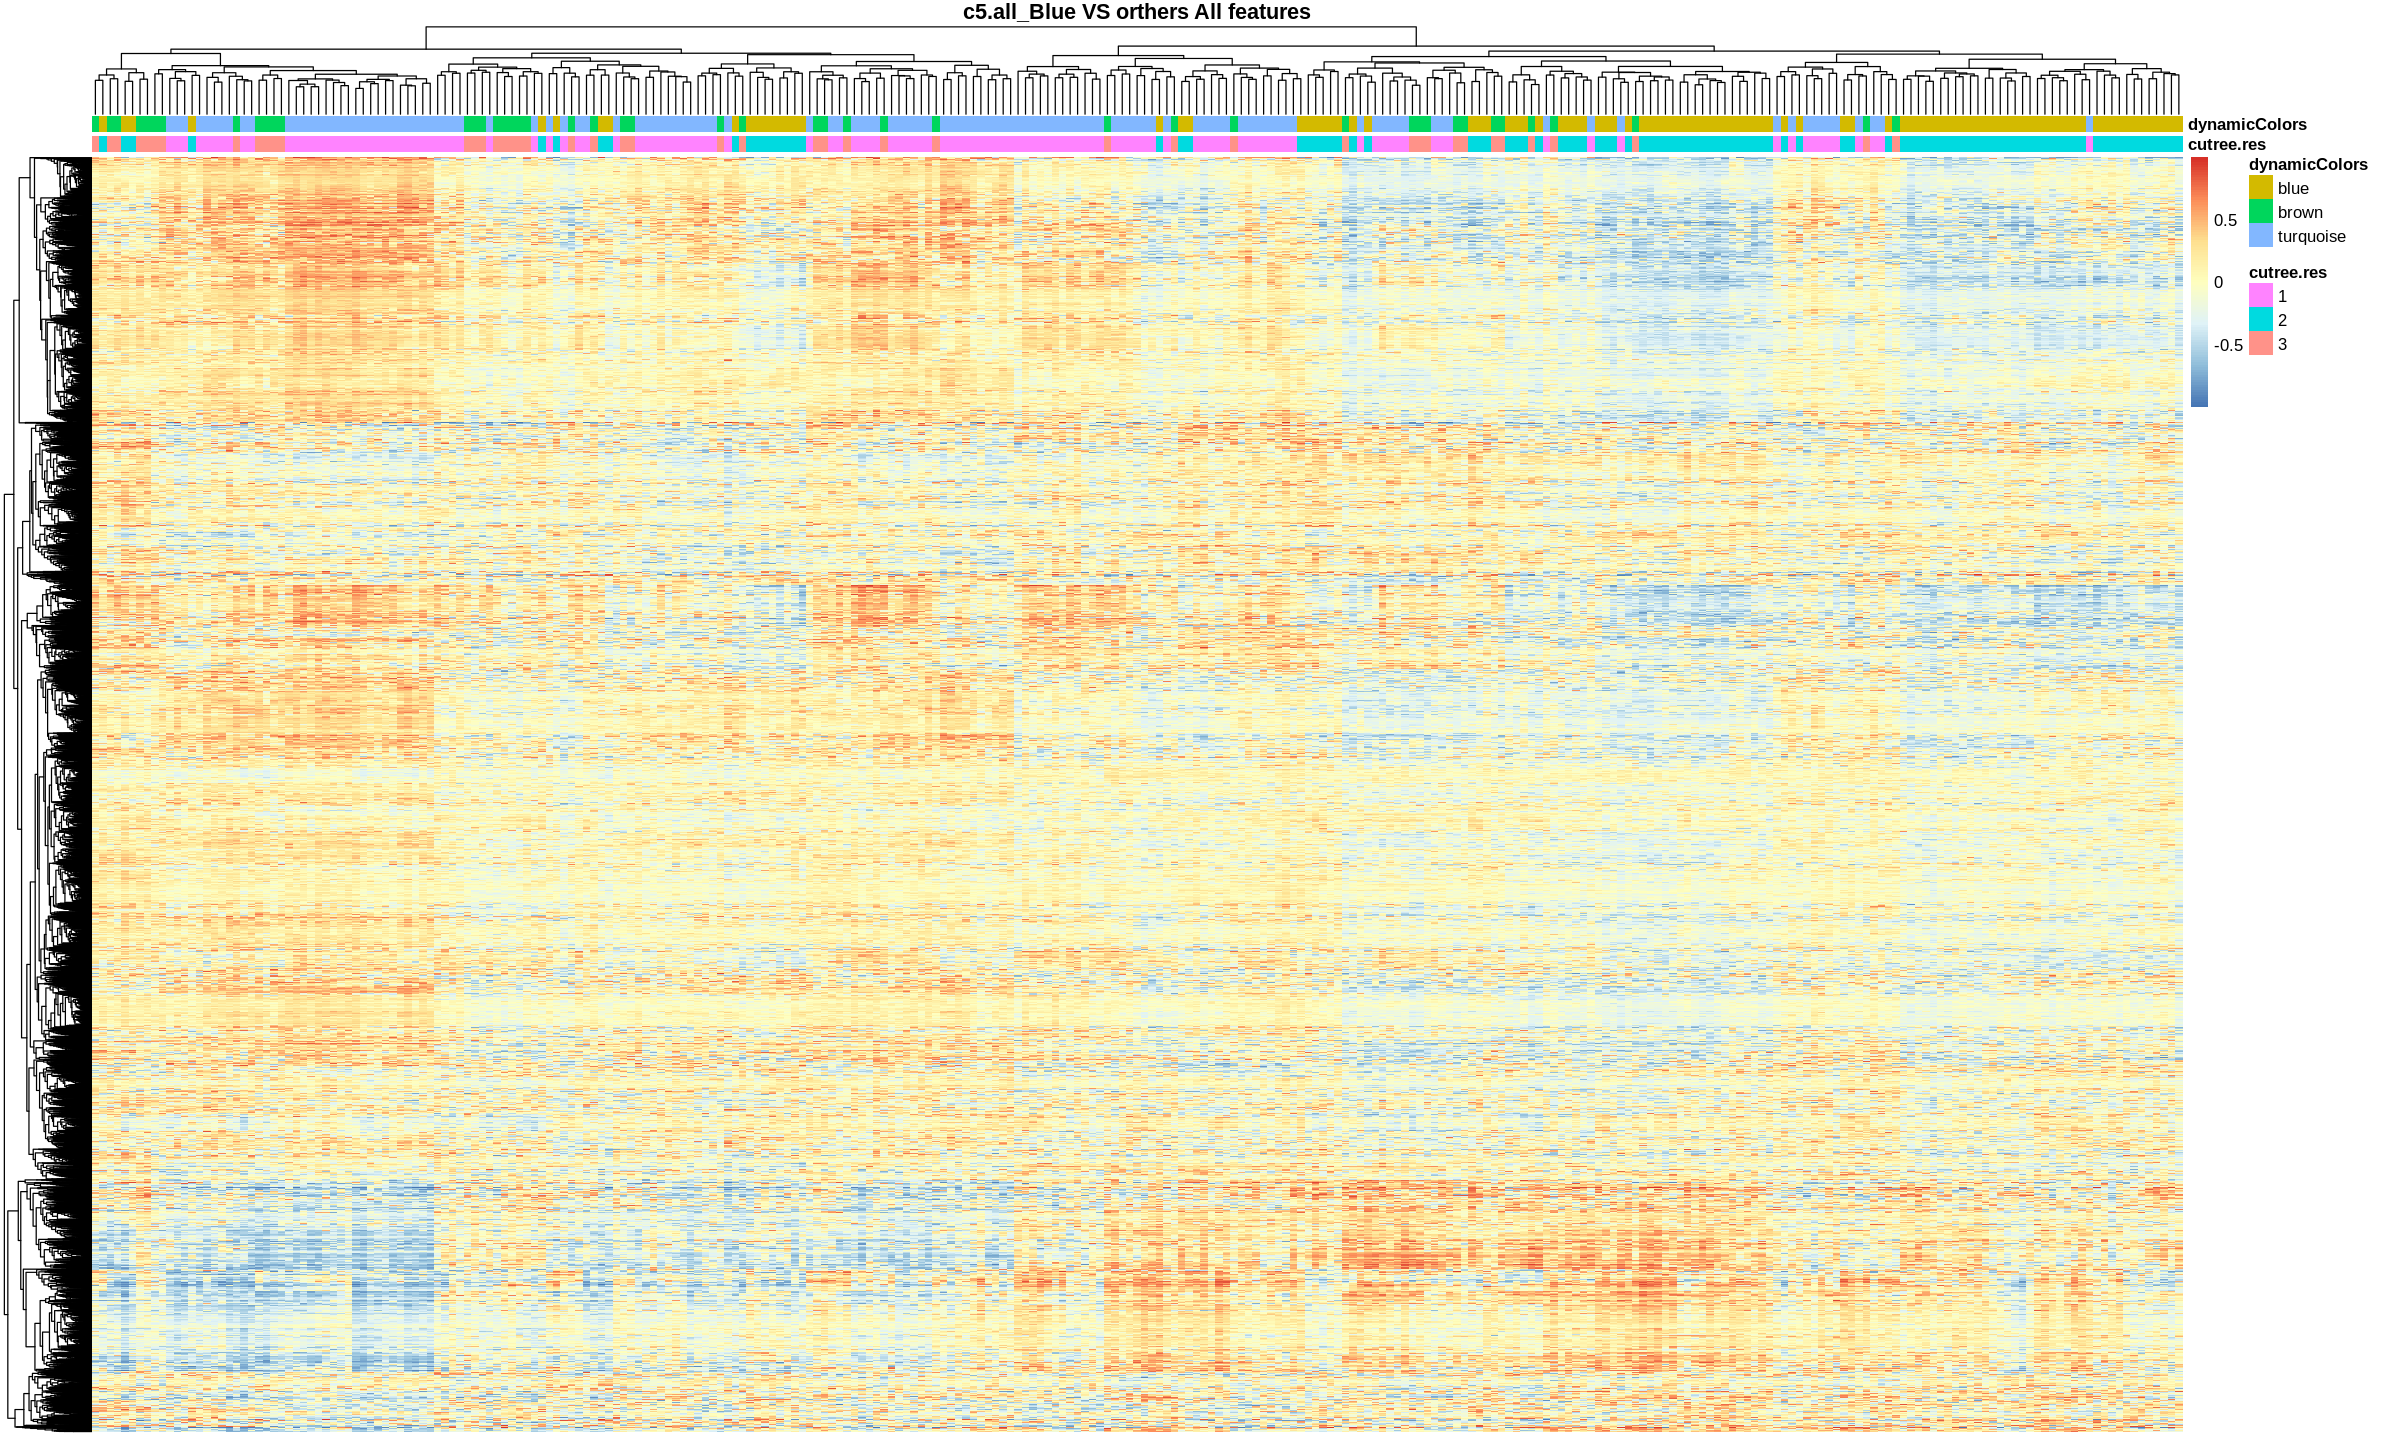

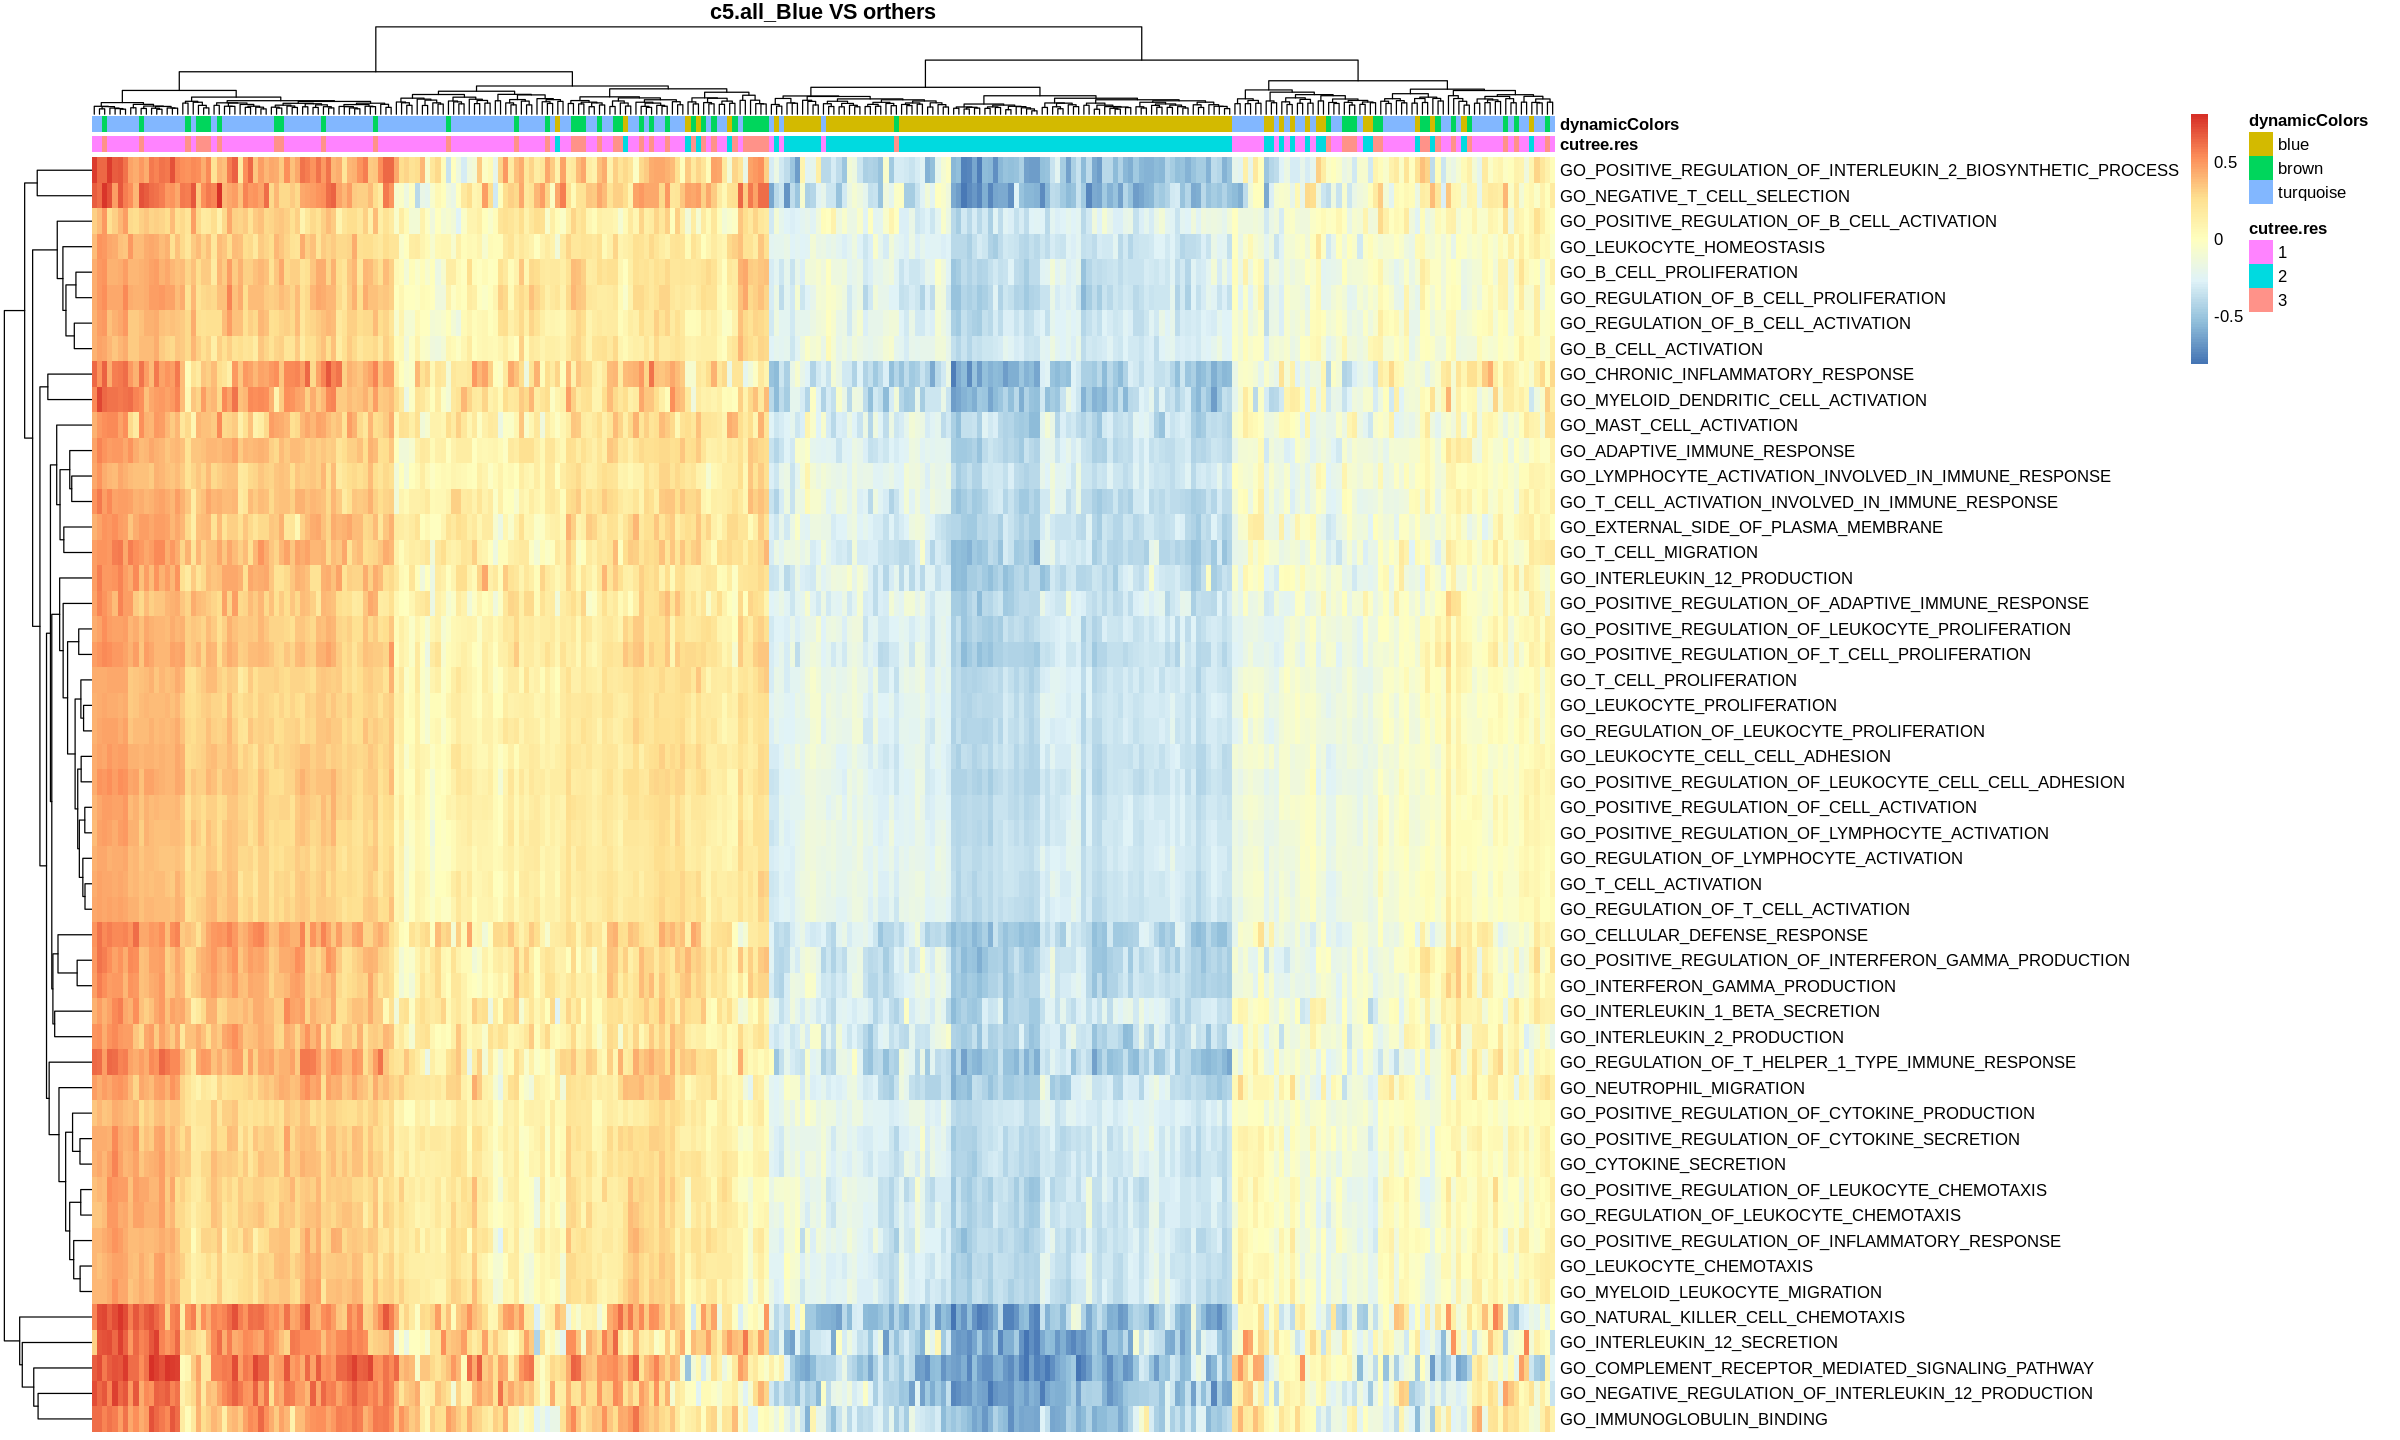

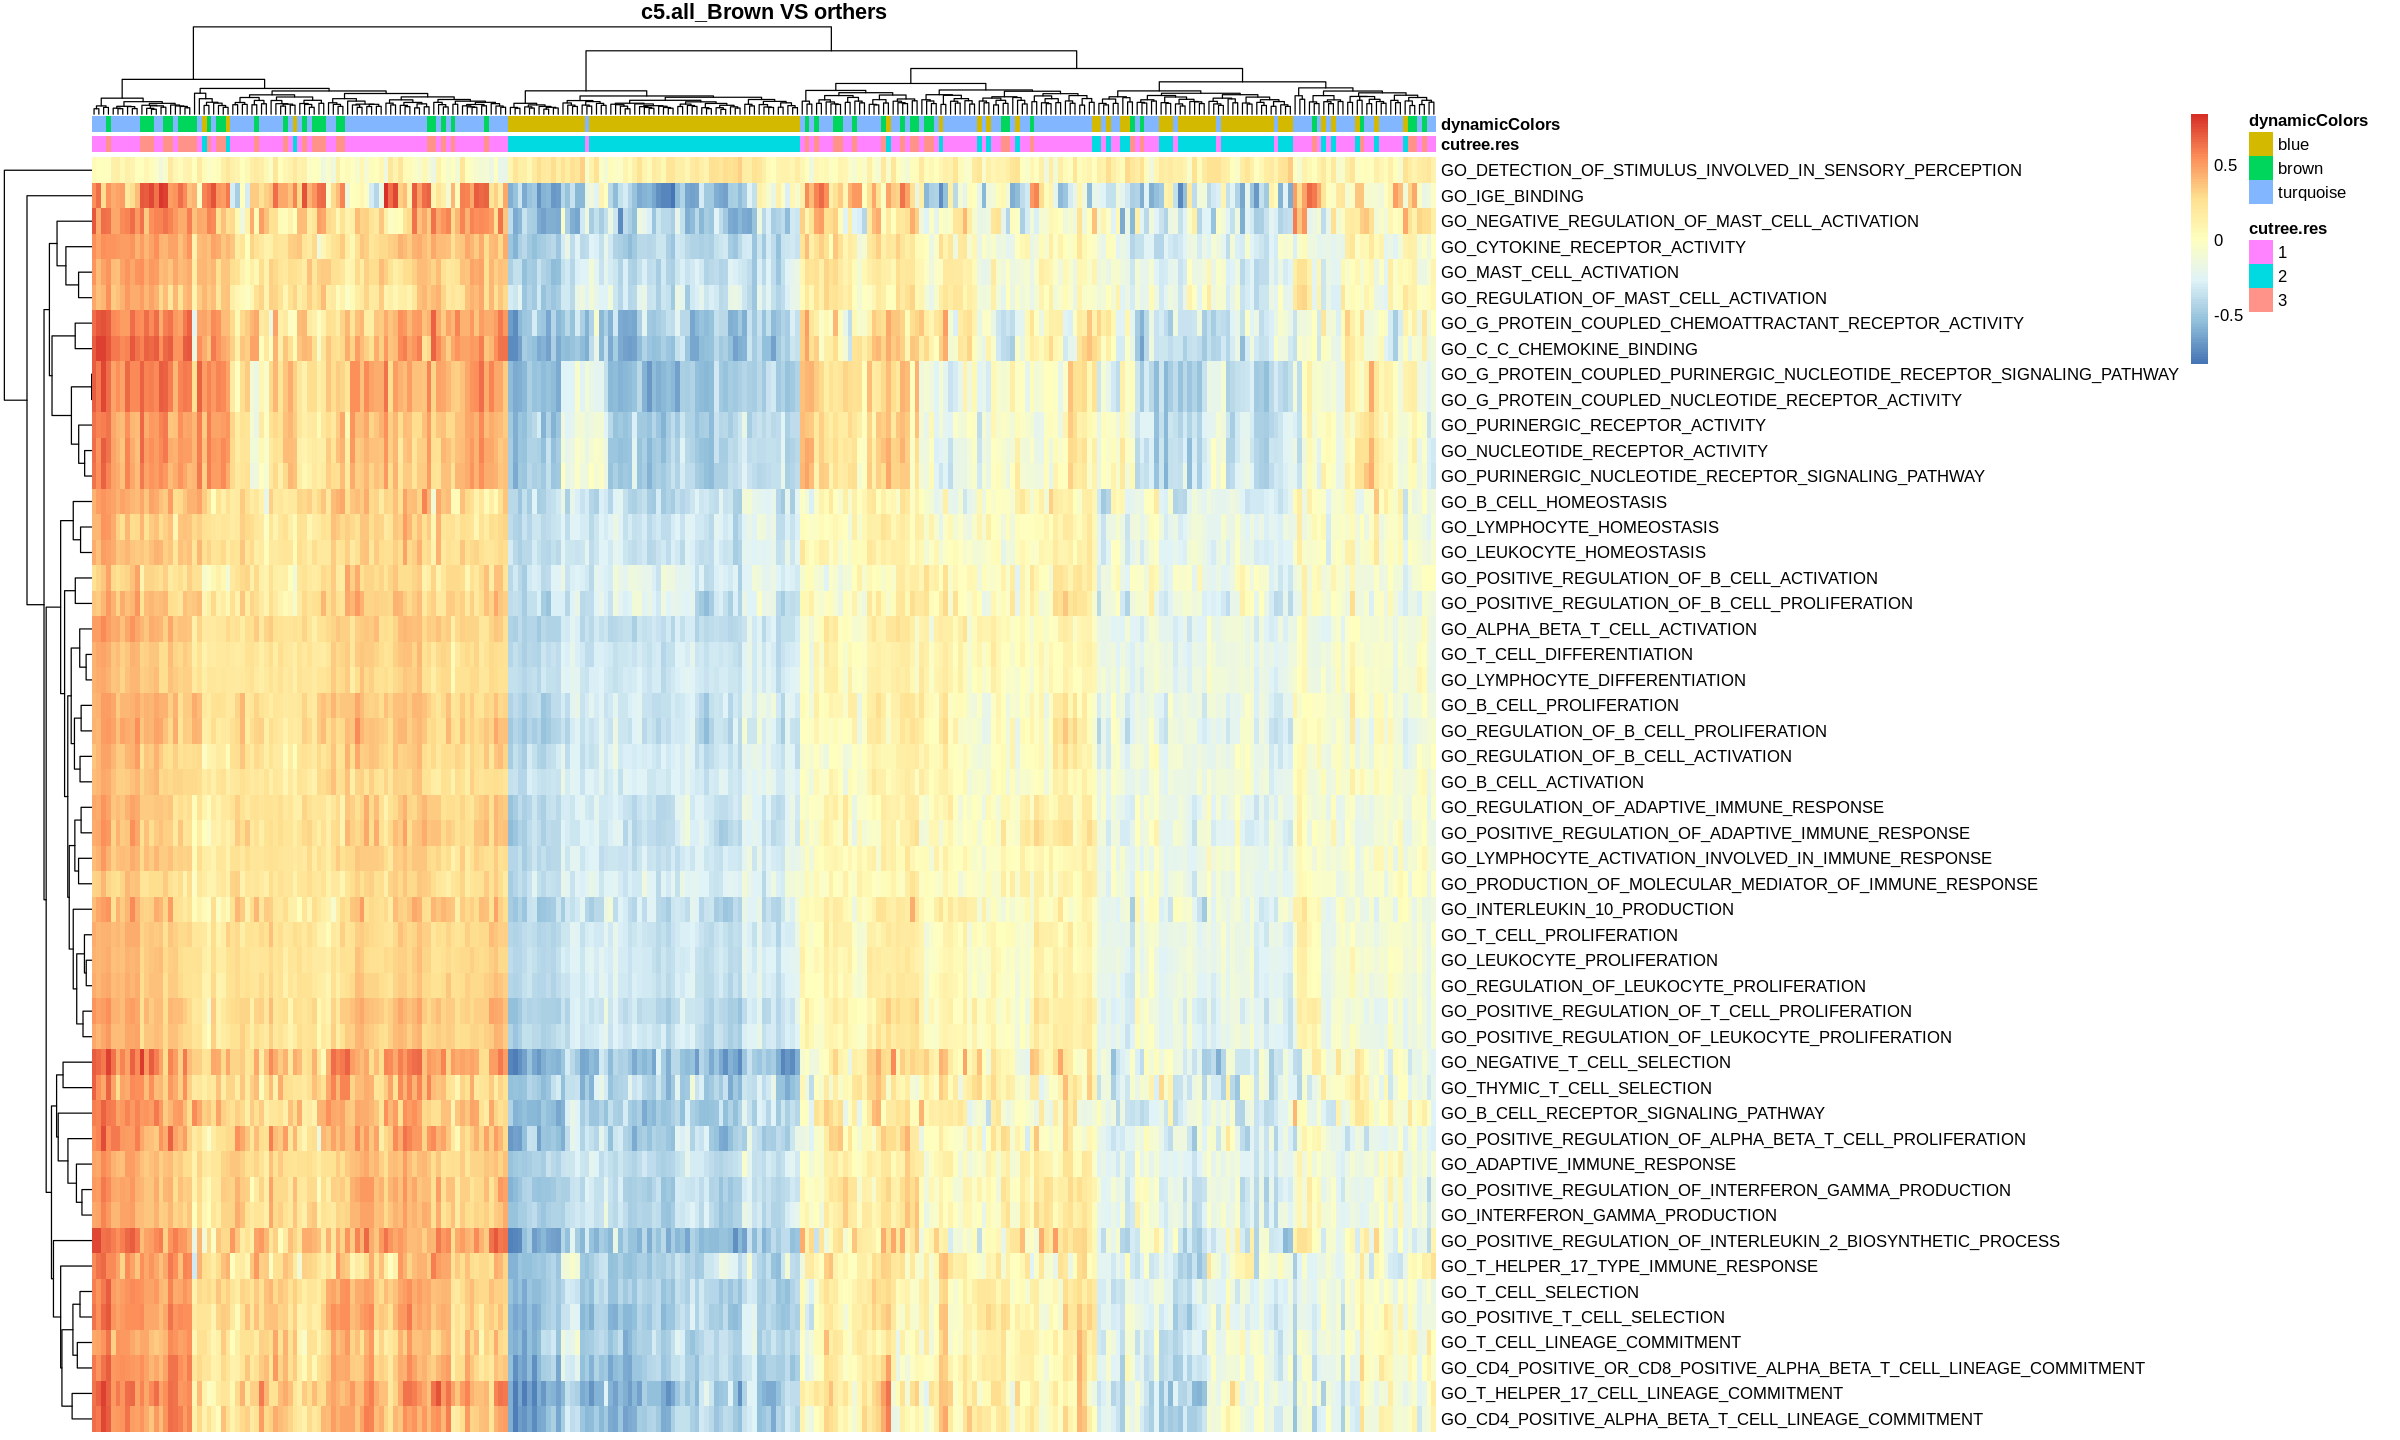

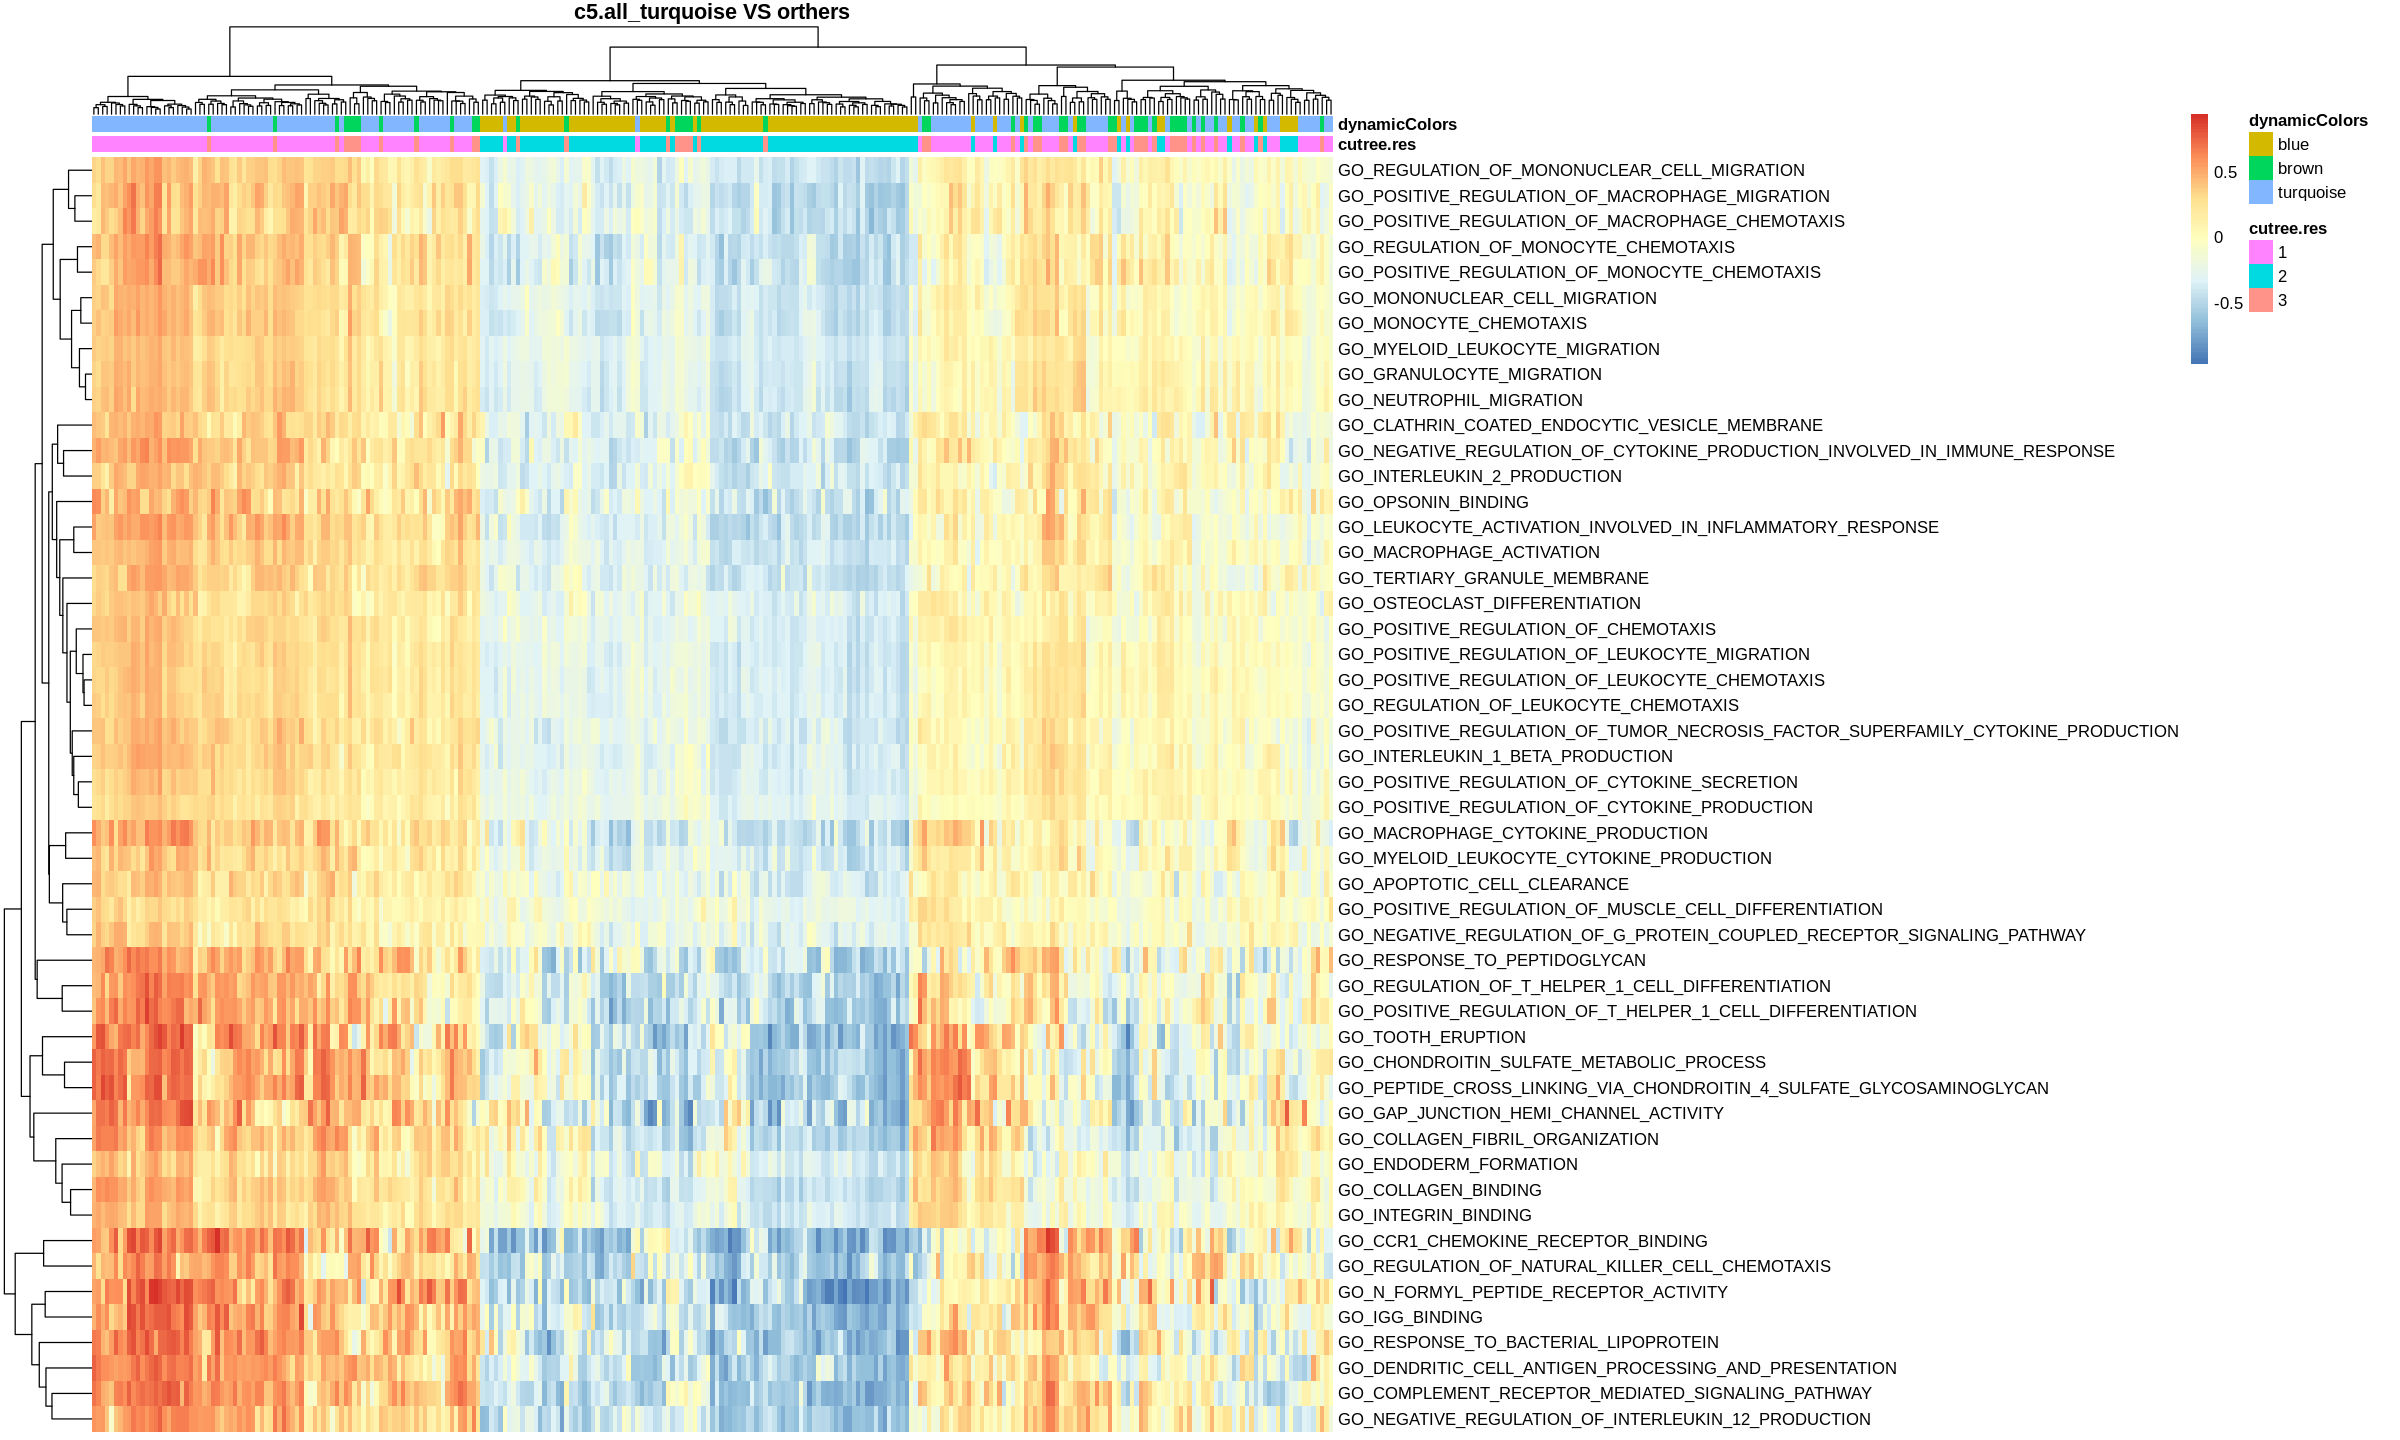

In [10]:
###################### COAD.c5.all.Set #################
library(pheatmap)
library(limma)
fit.c5 <- lmFit(COAD.c5.all.Set, design)
contrast.matrix <- makeContrasts(blue-(brown+turquoise), 
                                 brown-(blue+turquoise),
                                 turquoise-(brown+blue),
                                 levels=design)
fit.c5.2 <- contrasts.fit(fit.c5, contrast.matrix)
fit.c5.2 <- eBayes(fit.c5.2)

DEgeneSets.blue.c5 <- topTable(fit.c5.2, coef="blue - (brown + turquoise)", number=number,
                               p.value=adjPvalueCutoff,adjust="BH")
DEgeneSets.brown.c5 <- topTable(fit.c5.2, coef="brown - (blue + turquoise)", number=number,
                                p.value=adjPvalueCutoff,adjust="BH")
DEgeneSets.turquoise.c5 <- topTable(fit.c5.2, coef="turquoise - (brown + blue)", number=number,
                                    p.value=adjPvalueCutoff,adjust="BH")
#library(pheatmap)
## All
pheatmap::pheatmap(COAD.c5.all.Set,annotation_col = pData(COAD.c5.all.Set),
                   main = "c5.all_Blue VS orthers All features",show_rownames = F, show_colnames = F)

pheatmap::pheatmap(COAD.c5.all.Set[rownames(DEgeneSets.blue.c5),],annotation_col = pData(COAD.c5.all.Set),
                   main = "c5.all_Blue VS orthers",show_colnames = F)
pheatmap::pheatmap(COAD.c5.all.Set[rownames(DEgeneSets.brown.c5),],annotation_col = pData(COAD.c5.all.Set),
                   main = "c5.all_Brown VS orthers",show_colnames = F)
pheatmap::pheatmap(COAD.c5.all.Set[rownames(DEgeneSets.turquoise.c5),],annotation_col = pData(COAD.c2.all.Set),
                   main = "c5.all_turquoise VS orthers",show_colnames = F)


##### 4) COAD.c6.all.Set

Coefficients not estimable: yellow 


Warning message:
“Partial NA coefficients for 189 probe(s)”

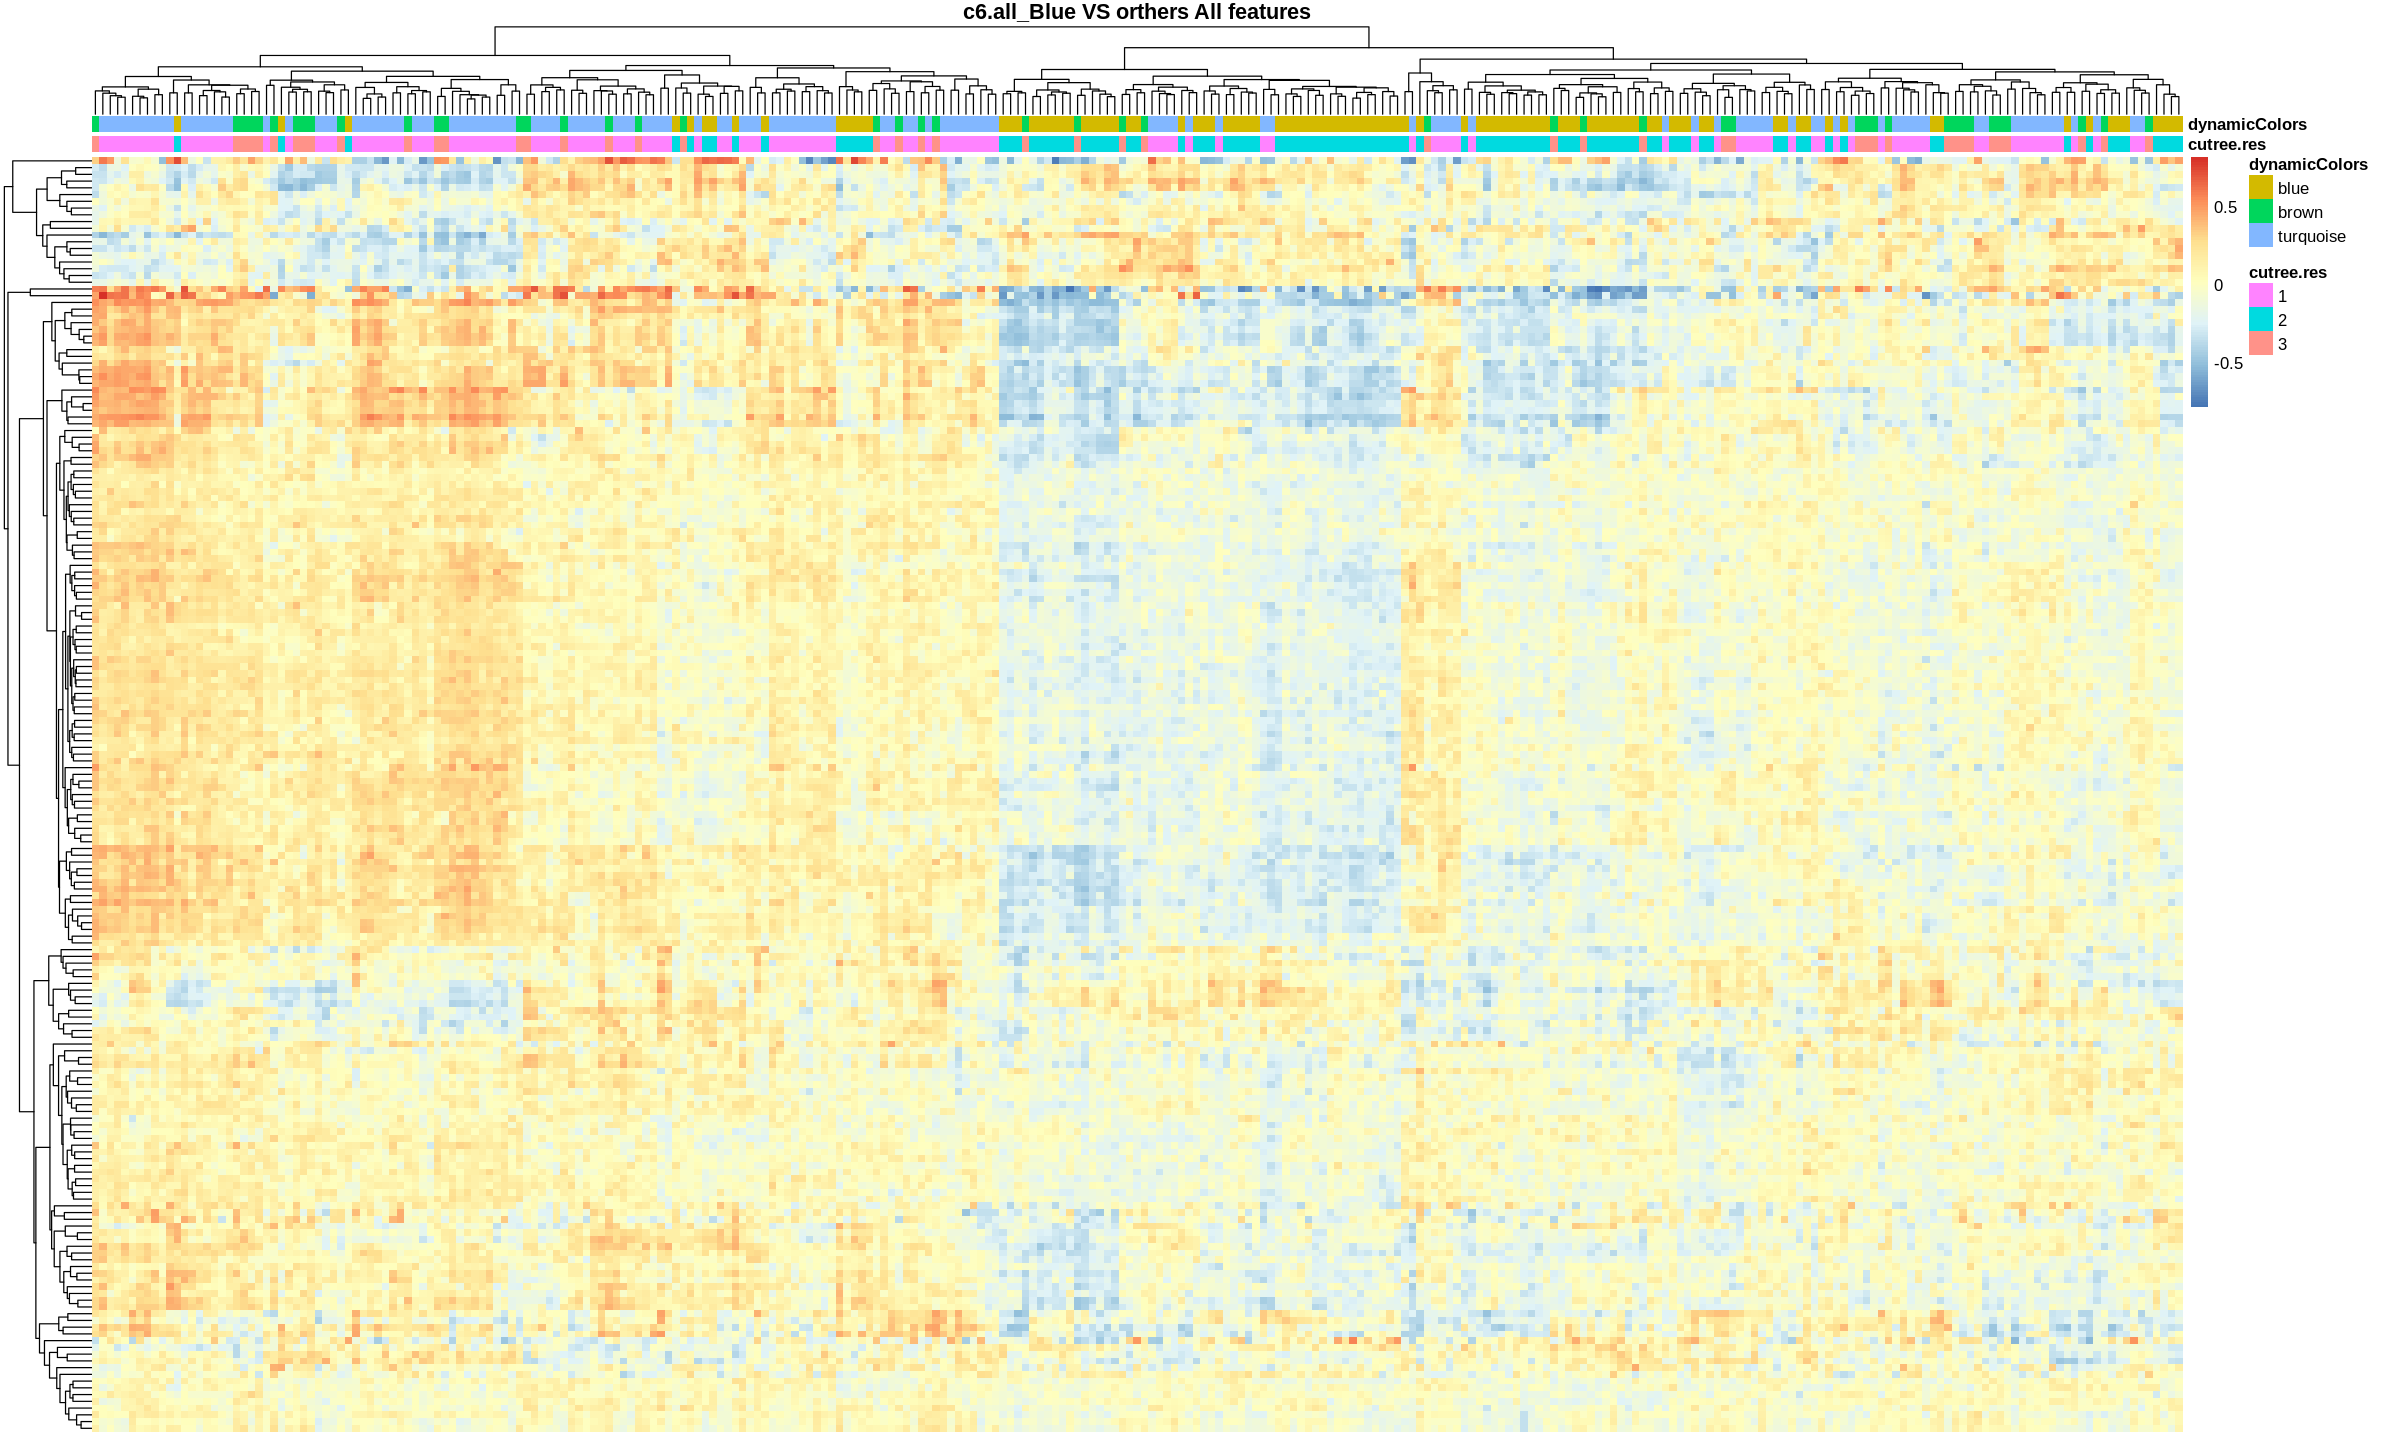

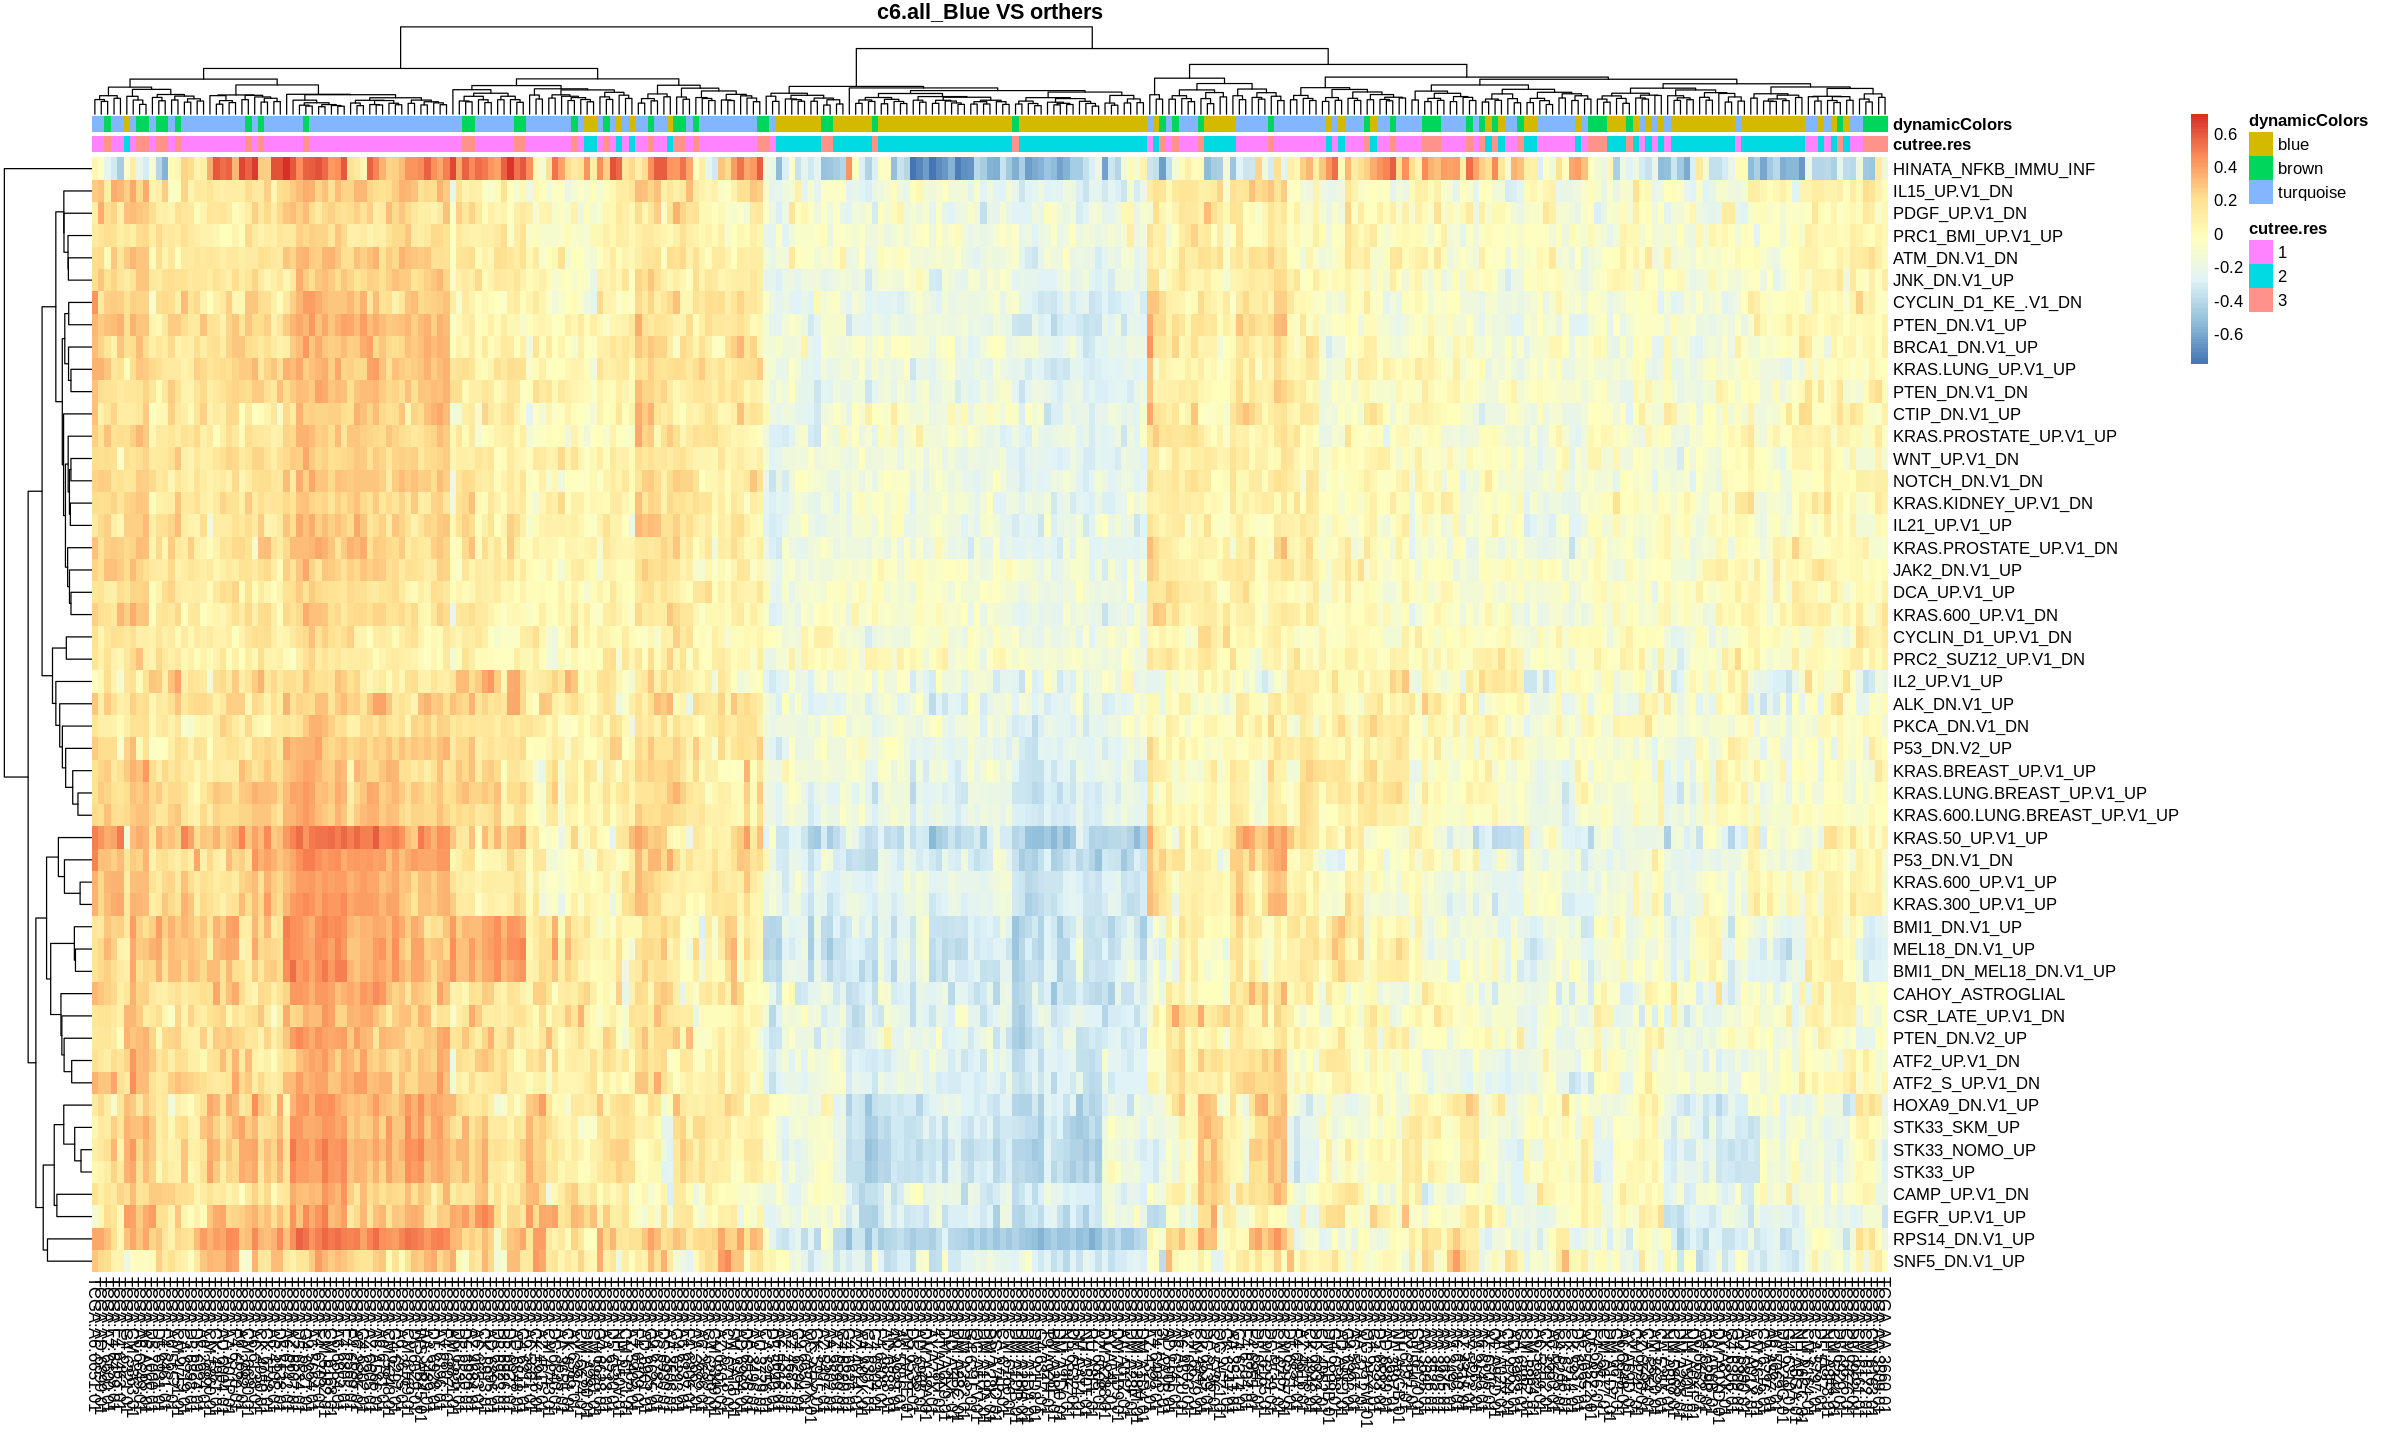

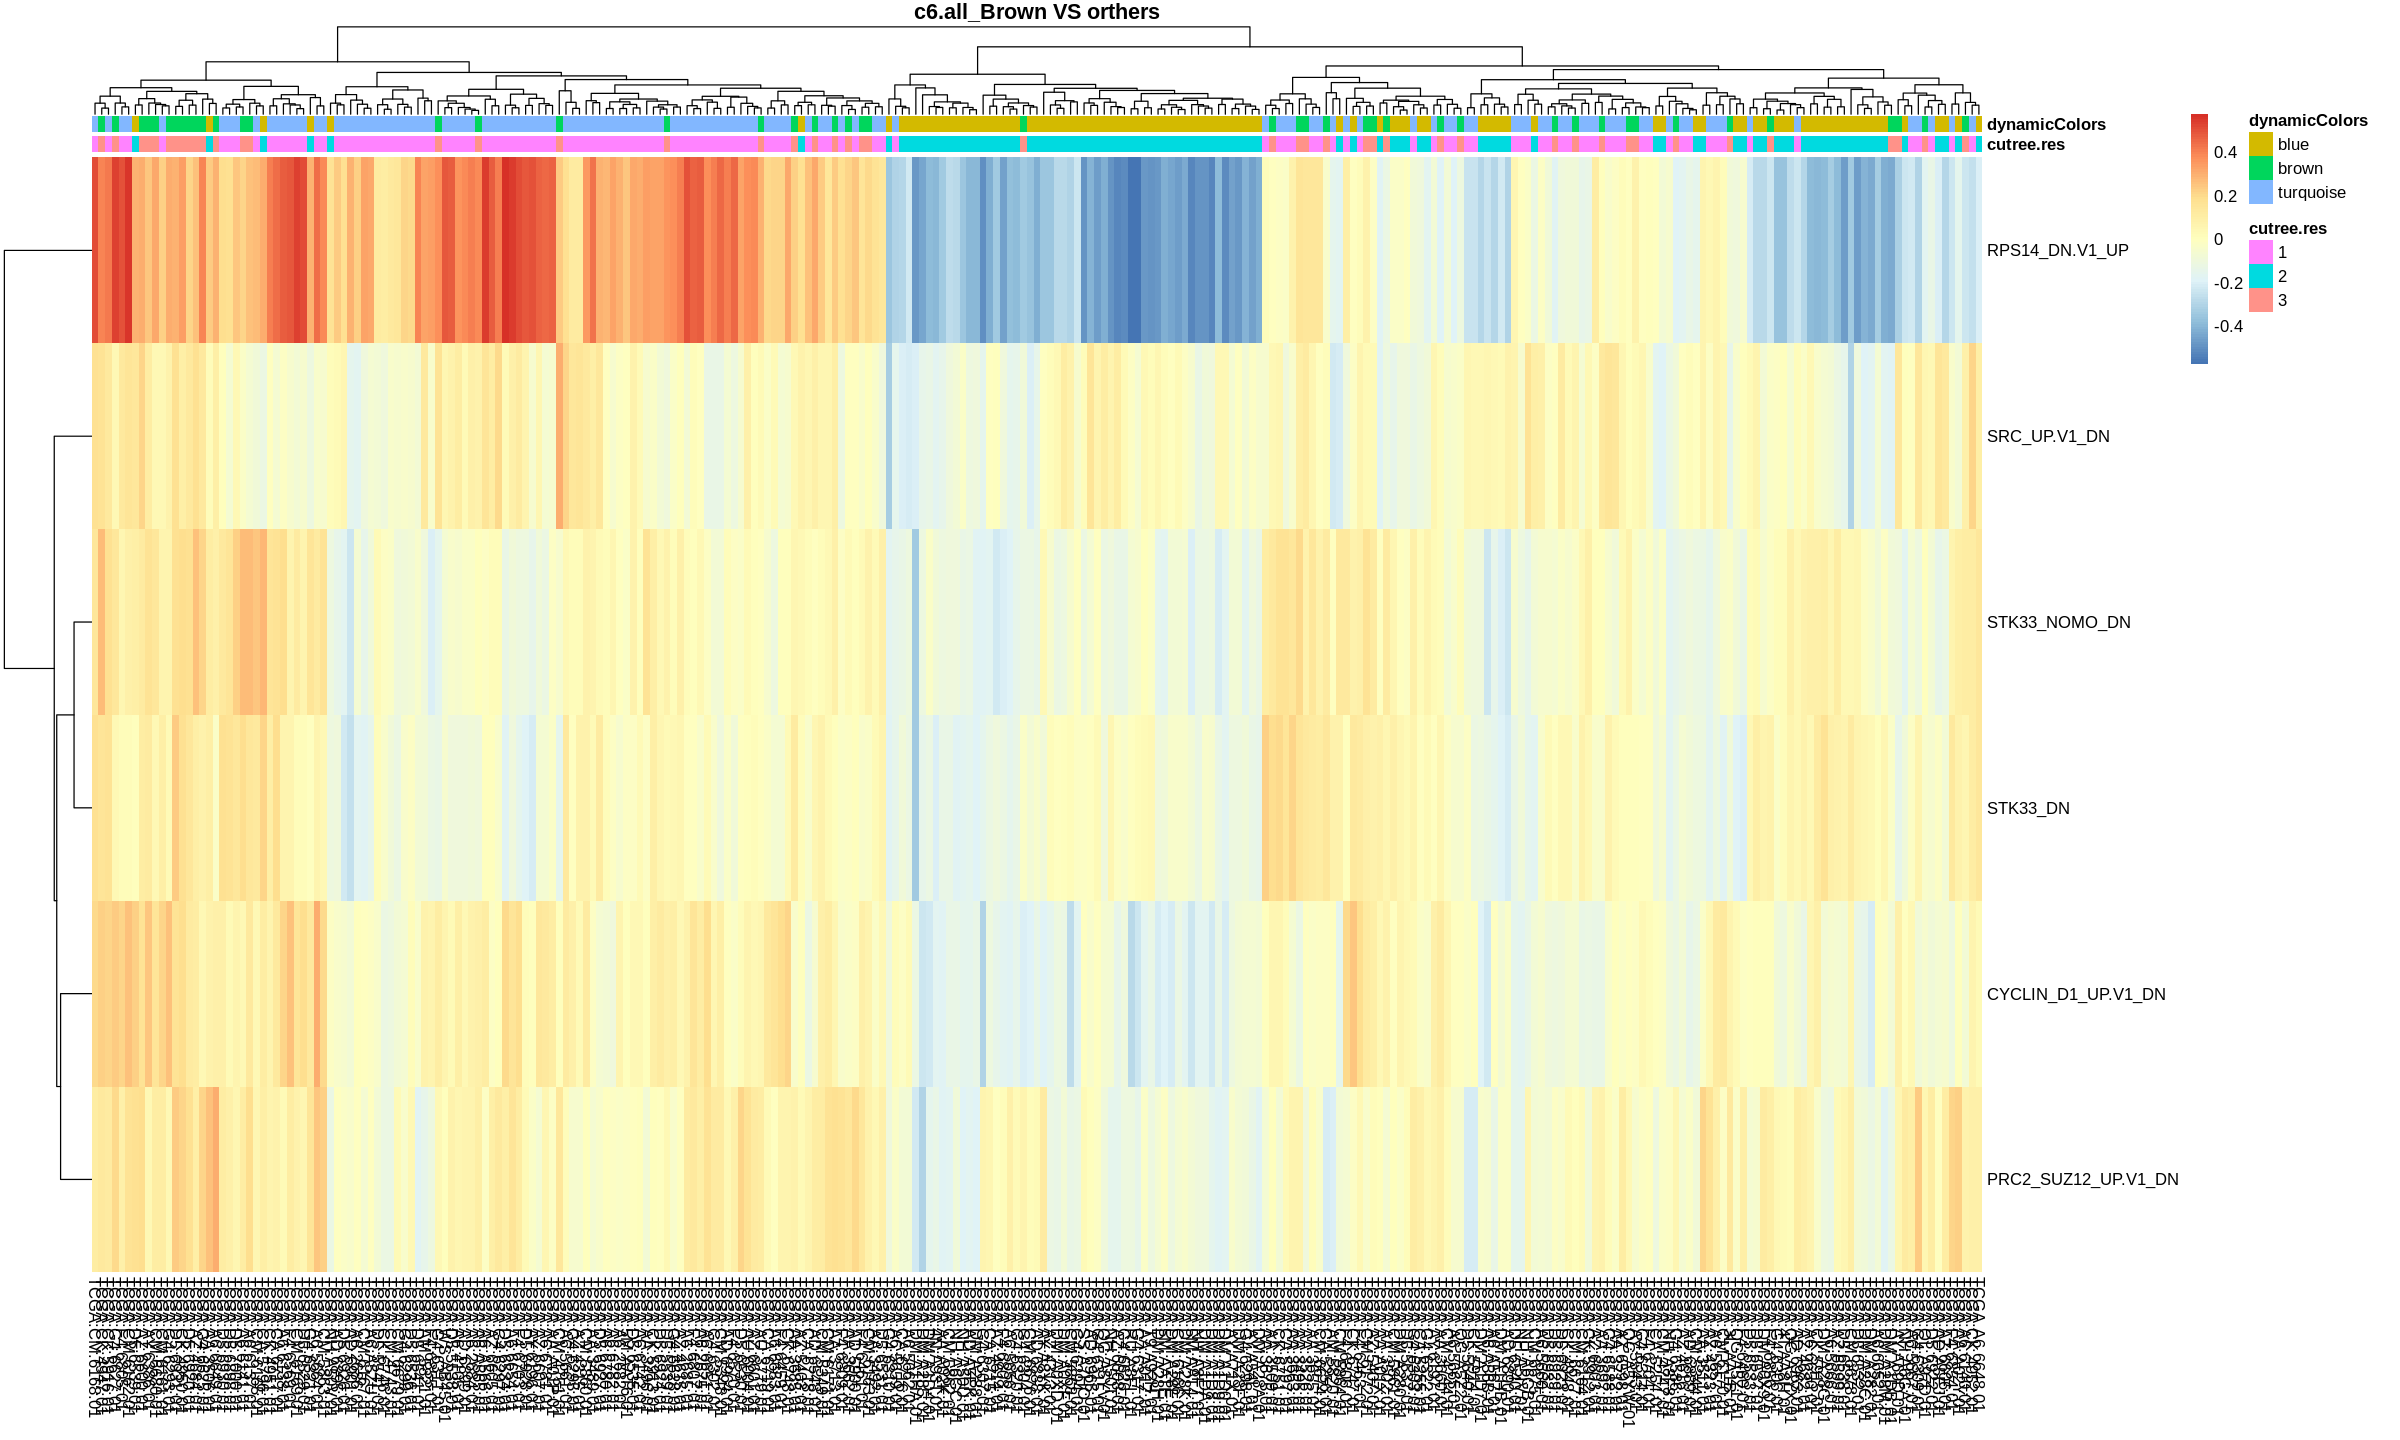

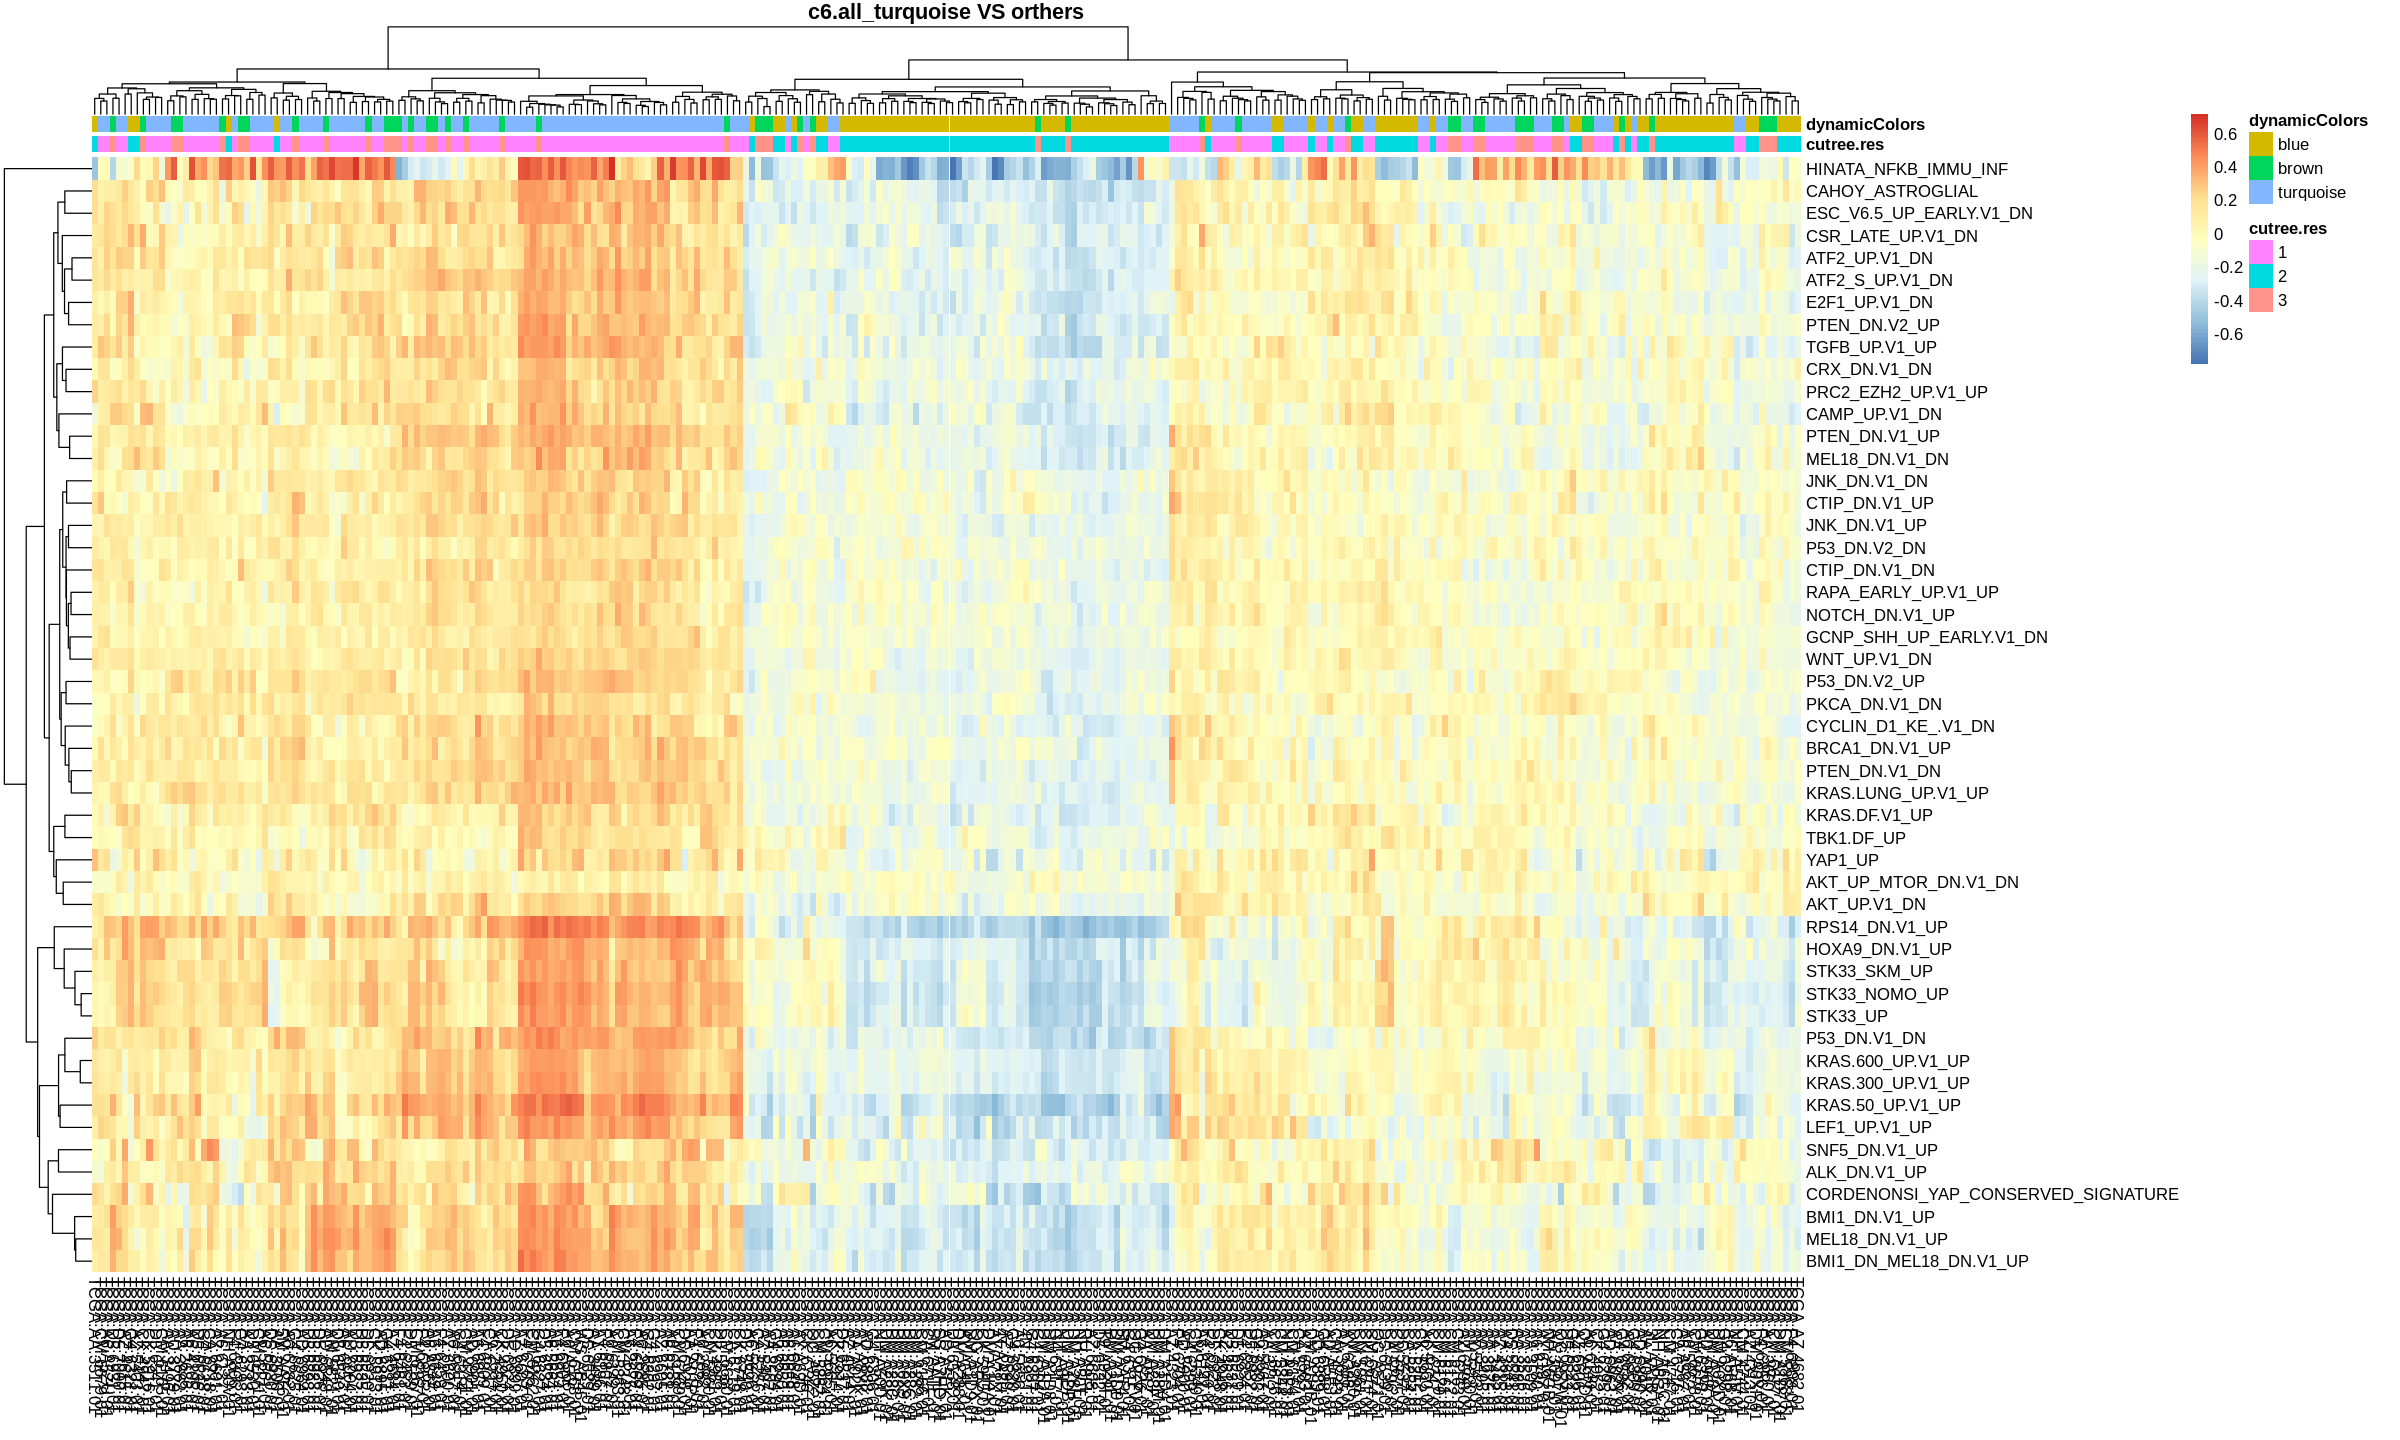

In [11]:
###################### COAD.c6.all.Set #################
library(pheatmap)
library(limma)
fit.c6 <- lmFit(COAD.c6.all.Set, design)
contrast.matrix <- makeContrasts(blue-(brown+turquoise), 
                                 brown-(blue+turquoise),
                                 turquoise-(brown+blue),
                                 levels=design)
fit.c6.2 <- contrasts.fit(fit.c6, contrast.matrix)
fit.c6.2 <- eBayes(fit.c6.2)

DEgeneSets.blue.c6 <- topTable(fit.c6.2, coef="blue - (brown + turquoise)", number=number,
                               p.value=adjPvalueCutoff,adjust="BH")
DEgeneSets.brown.c6 <- topTable(fit.c6.2, coef="brown - (blue + turquoise)", number=number,
                                p.value=adjPvalueCutoff,adjust="BH")
DEgeneSets.turquoise.c6 <- topTable(fit.c6.2, coef="turquoise - (brown + blue)", number=number,
                                    p.value=adjPvalueCutoff,adjust="BH")
#library(pheatmap)
## All
pheatmap::pheatmap(COAD.c6.all.Set,annotation_col = pData(COAD.c6.all.Set),
                   main = "c6.all_Blue VS orthers All features",show_rownames = F, show_colnames = F)

pheatmap::pheatmap(COAD.c6.all.Set[rownames(DEgeneSets.blue.c6),],annotation_col = pData(COAD.c6.all.Set),
                   main = "c6.all_Blue VS orthers")
pheatmap::pheatmap(COAD.c6.all.Set[rownames(DEgeneSets.brown.c6),],annotation_col = pData(COAD.c6.all.Set),
                   main = "c6.all_Brown VS orthers")
pheatmap::pheatmap(COAD.c6.all.Set[rownames(DEgeneSets.turquoise.c6),],annotation_col = pData(COAD.c2.all.Set),
                   main = "c6.all_turquoise VS orthers")
